# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.cm as cm
from scipy.stats import wasserstein_distance, energy_distance
import matplotlib
import plotly.figure_factory as ff
print()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Analyzing quantitive measures for the Template and Graphs of question 1

## loading the graphs into pandas dataframes

In [0]:
# csv files are read from the drive connected to the notebook
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')
dfSeed1 = pd.read_csv('drive/My Drive/data/Seed1-Graph1.csv')
dfSeed2 = pd.read_csv('drive/My Drive/data/Seed2-Graph1.csv')
dfSeed3 = pd.read_csv('drive/My Drive/data/Seed3-Graph1.csv')

### Numerical data for question 1 graphs

#### Creating the graphs

##### Normal graph

In [0]:
# Creating empty Directed graphs for each of the graphs
templateG = nx.Graph()
graph1G = nx.Graph()
graph2G = nx.Graph()
graph3G = nx.Graph()
graph4G = nx.Graph()
graph5G = nx.Graph()
seed1G  = nx.Graph()
seed2G  = nx.Graph()
seed3G  = nx.Graph()

##### Directed Graph

In [0]:
# Creating empty Directed graphs for each of the graphs
templateG = nx.DiGraph()
graph1G = nx.DiGraph()
graph2G = nx.DiGraph()
graph3G = nx.DiGraph()
graph4G = nx.DiGraph()
graph5G = nx.DiGraph()
seed1G  = nx.DiGraph()
seed2G  = nx.DiGraph()
seed3G  = nx.DiGraph()

##### Directed Multi Graph

In [0]:
# Creating empty Multi-way Directed graphs(repeated edges are considered) for each of the graphs
templateG = nx.MultiDiGraph()
graph1G = nx.MultiDiGraph()
graph2G = nx.MultiDiGraph()
graph3G = nx.MultiDiGraph()
graph4G = nx.MultiDiGraph()
graph5G = nx.MultiDiGraph()
seed1G = nx.MultiDiGraph()
seed2G = nx.MultiDiGraph()
seed3G = nx.MultiDiGraph()

##### Tuples

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph All channels
# for adding the edges into the graphs we first need to create a list of tuples of those edges
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1["Source"], dfGraph1["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2["Source"], dfGraph2["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3["Source"], dfGraph3["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4["Source"], dfGraph4["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5["Source"], dfGraph5["Target"])]
seed1NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed1["Source"], dfSeed1["Target"])]
seed2NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed2["Source"], dfSeed2["Target"])]
seed3NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed3["Source"], dfSeed3["Target"])]

##### Tuples Time weighted

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph All channels
# for adding the edges into the graphs we first need to create a list of tuples of those edges
# Time added as a weight
templateNodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])]
graph1NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph1["Source"], dfGraph1["Target"], dfGraph1["Time"])]
graph2NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph2["Source"], dfGraph2["Target"], dfGraph2["Time"])]
graph3NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph3["Source"], dfGraph3["Target"], dfGraph3["Time"])]
graph4NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph4["Source"], dfGraph4["Target"], dfGraph4["Time"])]
graph5NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfGraph5["Source"], dfGraph5["Target"], dfGraph5["Time"])]
seed1NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfSeed1["Source"], dfSeed1["Target"], dfSeed1["Time"])]
seed2NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfSeed2["Source"], dfSeed2["Target"], dfSeed2["Time"])]
seed3NodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfSeed3["Source"], dfSeed3["Target"], dfSeed3["Time"])]

##### Tuples Communication

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph Communication channel
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"],
                      dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"], 
                                                  dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Source"], 
                                                  dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Source"], 
                                                  dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Source"], 
                                                  dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Target"])]
seed1NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed1[(dfSeed1["eType"] == 0) | (dfSeed1["eType"] == 1)]["Source"], 
                                                  dfSeed1[(dfSeed1["eType"] == 0) | (dfSeed1["eType"] == 1)]["Target"])]
seed2NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed2[(dfSeed2["eType"] == 0) | (dfSeed2["eType"] == 1)]["Source"], 
                                                  dfSeed2[(dfSeed2["eType"] == 0) | (dfSeed2["eType"] == 1)]["Target"])]
seed35NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed3[(dfSeed3["eType"] == 0) | (dfSeed3["eType"] == 1)]["Source"], 
                                                  dfSeed3[(dfSeed3["eType"] == 0) | (dfSeed3["eType"] == 1)]["Target"])]


##### Tuples Procurement

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph Procurement channel
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 2) | (dfTemplate["eType"] == 3)]["Source"],
                      dfTemplate[(dfTemplate["eType"] == 2) | (dfTemplate["eType"] == 3)]["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1[(dfGraph1["eType"] == 2) | (dfGraph1["eType"] == 3)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 2) | (dfGraph1["eType"] == 3)]["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2[(dfGraph2["eType"] == 2) | (dfGraph2["eType"] == 3)]["Source"], 
                                                  dfGraph2[(dfGraph2["eType"] == 2) | (dfGraph2["eType"] == 3)]["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3[(dfGraph3["eType"] == 2) | (dfGraph3["eType"] == 3)]["Source"], 
                                                  dfGraph3[(dfGraph3["eType"] == 2) | (dfGraph3["eType"] == 3)]["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4[(dfGraph4["eType"] == 2) | (dfGraph4["eType"] == 3)]["Source"], 
                                                  dfGraph4[(dfGraph4["eType"] == 2) | (dfGraph4["eType"] == 3)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5[(dfGraph5["eType"] == 2) | (dfGraph5["eType"] == 3)]["Source"], 
                                                  dfGraph5[(dfGraph5["eType"] == 2) | (dfGraph5["eType"] == 3)]["Target"])]
seed1NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed1[(dfSeed1["eType"] == 2) | (dfSeed1["eType"] == 3)]["Source"], 
                                                  dfSeed1[(dfSeed1["eType"] == 2) | (dfSeed1["eType"] == 3)]["Target"])]
seed2NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed2[(dfSeed2["eType"] == 2) | (dfSeed2["eType"] == 3)]["Source"], 
                                                  dfSeed2[(dfSeed2["eType"] == 2) | (dfSeed2["eType"] == 3)]["Target"])]
seed3NodesTuple = [tuple([x, y]) for x, y in zip(dfSeed3[(dfSeed3["eType"] == 2) | (dfSeed3["eType"] == 3)]["Source"], 
                                                  dfSeed3[(dfSeed3["eType"] == 2) | (dfSeed3["eType"] == 3)]["Target"])]


##### Adding the edges

In [5]:
# Creating graph objects from the tuples
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)
seed1G.add_edges_from(seed1NodesTuple)
seed2G.add_edges_from(seed2NodesTuple)
seed3G.add_edges_from(seed3NodesTuple)
print("")

###### Weighted edges

In [0]:
# Creating graph objects from the tuples 
# with a weight
templateG.add_weighted_edges_from(templateNodesTuple)
graph1G.add_weighted_edges_from(graph1NodesTuple)
graph2G.add_weighted_edges_from(graph2NodesTuple)
graph3G.add_weighted_edges_from(graph3NodesTuple)
graph4G.add_weighted_edges_from(graph4NodesTuple)
graph5G.add_weighted_edges_from(graph5NodesTuple)
seed1G.add_weighted_edges_from(seed1NodesTuple)
seed2G.add_weighted_edges_from(seed2NodesTuple)
seed3G.add_weighted_edges_from(seed3NodesTuple)
print("")

##### Graph info

In [0]:
tempInfo = nx.info(templateG)

In [0]:
tempInfo

'Name: \nType: MultiDiGraph\nNumber of nodes: 88\nNumber of edges: 1325\nAverage in degree:  15.0568\nAverage out degree:  15.0568'

In [0]:
print(nx.info(templateG))

Name: 
Type: MultiDiGraph
Number of nodes: 88
Number of edges: 1325
Average in degree:  15.0568
Average out degree:  15.0568


In [0]:
print(nx.info(graph1G))

Name: 
Type: MultiDiGraph
Number of nodes: 93
Number of edges: 1216
Average in degree:  13.0753
Average out degree:  13.0753


In [0]:
print(nx.info(graph2G))

Name: 
Type: MultiDiGraph
Number of nodes: 87
Number of edges: 1300
Average in degree:  14.9425
Average out degree:  14.9425


In [0]:
print(nx.info(graph3G))

Name: 
Type: MultiDiGraph
Number of nodes: 79
Number of edges: 729
Average in degree:   9.2278
Average out degree:   9.2278


In [0]:
print(nx.info(graph4G))

Name: 
Type: MultiDiGraph
Number of nodes: 87
Number of edges: 732
Average in degree:   8.4138
Average out degree:   8.4138


In [0]:
print(nx.info(graph5G))

Name: 
Type: MultiDiGraph
Number of nodes: 86
Number of edges: 395
Average in degree:   4.5930
Average out degree:   4.5930


In [0]:
print(nx.info(seed1G))

Name: 
Type: MultiDiGraph
Number of nodes: 44
Number of edges: 498
Average in degree:  11.3182
Average out degree:  11.3182


In [0]:
print(nx.info(seed2G))

Name: 
Type: MultiDiGraph
Number of nodes: 96
Number of edges: 333
Average in degree:   3.4688
Average out degree:   3.4688


In [0]:
print(nx.info(seed3G))

Name: 
Type: MultiDiGraph
Number of nodes: 53
Number of edges: 379
Average in degree:   7.1509
Average out degree:   7.1509


###### Tests

In [0]:
testG = nx.MultiDiGraph()

In [0]:
templateNodesTuple[1:20]

In [0]:
templateNodesTuple = [tuple([x, y, z]) for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])]

In [0]:
zip(range(5), range(6), range(2))

In [0]:
max([x for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])])

620120

In [0]:
a = [testG.add_edge(x, y,time = z) for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])]

In [0]:
print(min([x for y, x in list(testG.in_degree())]),
      max([x for y, x in list(testG.in_degree())]))

0 72


In [0]:
testG.degree()

DiMultiDegreeView({0: 38, -99: 1, 41: 208, 34: 93, 37: 102, 27: 98, 40: 55, 39: 116, 65: 56, 67: 54, 47: 105, 66: 5, 657187: 18, 78: 4, 81: 7, 80: 4, 70: 13, 43: 74, 56: 85, 57: 64, 58: 95, 63: 120, 77: 4, 79: 4, 45: 76, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19})

In [0]:
graph1G.degree()

DiMultiDegreeView({599956: 74, 635665: 115, 490041: 55, 589639: 35, 533140: 20, 591682: 6, 568093: 12, 616050: 15, 632150: 16, 464459: 9, 512397: 19, 550287: 12, 559657: 5, 623295: 54, 492777: 59, 570411: 20, 550361: 35, 493044: 24, 596193: 30, 640464: 21})

In [0]:
testG2 = nx.MultiDiGraph()
testTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]

In [0]:
a = testG2.add_edges_from(testTuple)

In [0]:
print(min([x for y, x in list(testG2.in_degree())]),
      max([x for y, x in list(testG2.in_degree())]))

0 72


In [0]:
np.size(a,0)

86

#### heatmap

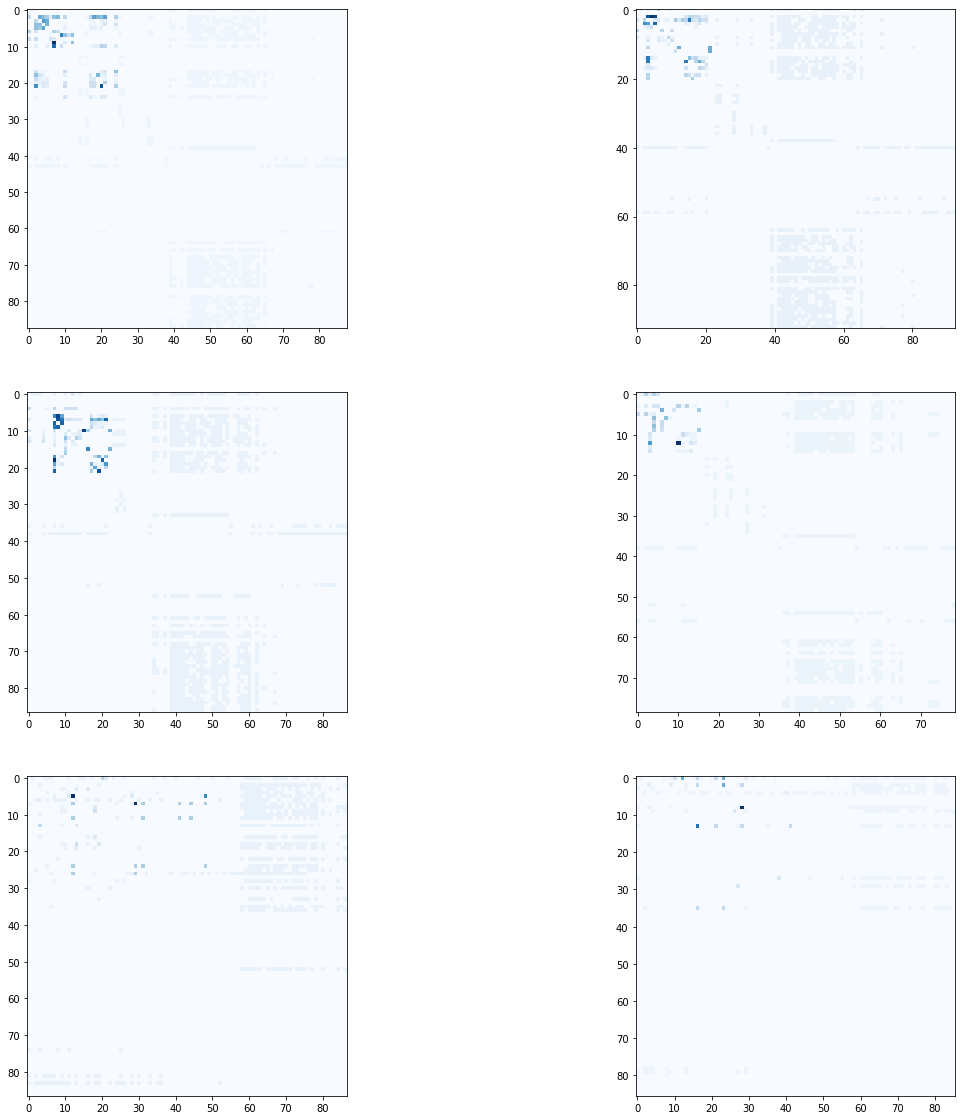

In [0]:
# nx.to_numpy_matrix(graph1G)


# Make an array with ones in the shape of an 'X'

fig = plt.figure(figsize=(20, 20)) 

a = nx.to_numpy_matrix(templateG)
ax1 = fig.add_subplot(321)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph1G)
ax1 = fig.add_subplot(322)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph2G)
ax1 = fig.add_subplot(323)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph3G)
ax1 = fig.add_subplot(324)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph4G)
ax1 = fig.add_subplot(325)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph5G)
ax1 = fig.add_subplot(326)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)


plt.show()

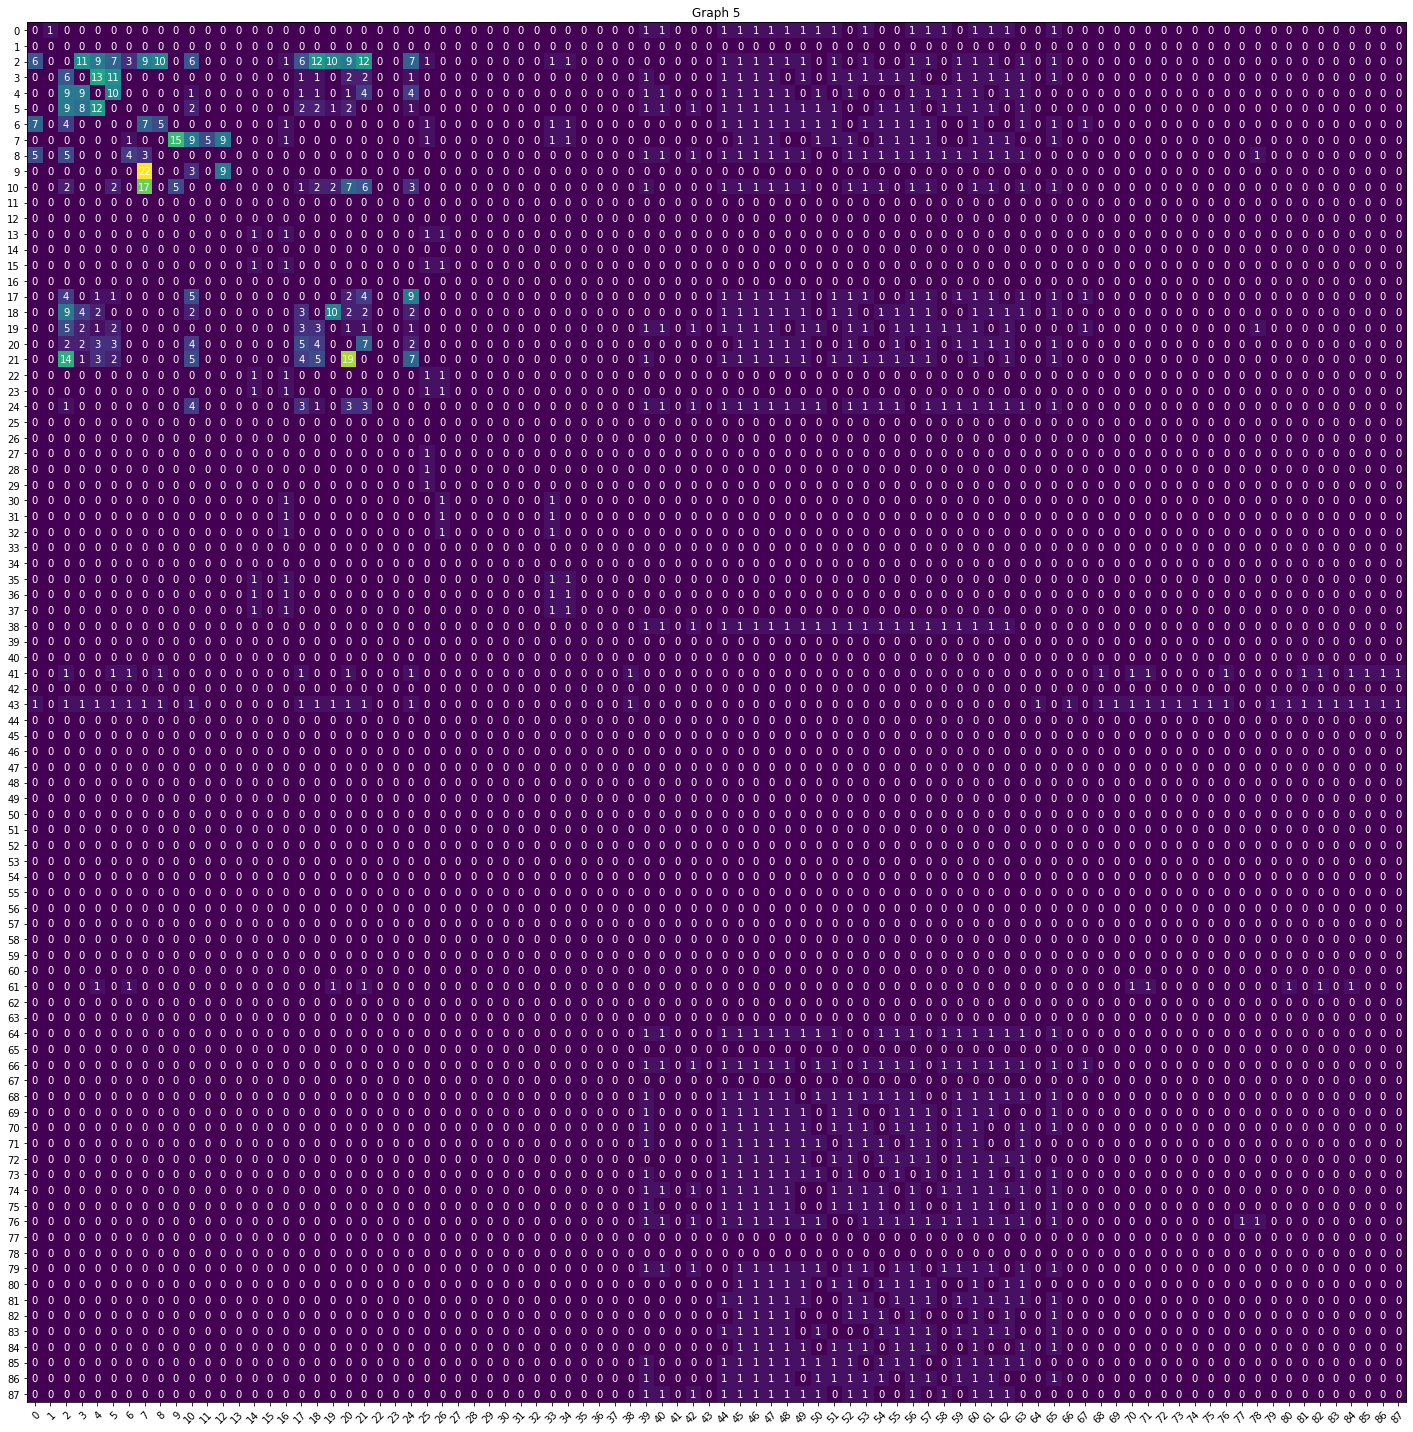

In [0]:
#fig = plt.figure(figsize=(20, 20)) 
a = nx.to_numpy_matrix(templateG)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
im = ax.imshow(a)

ax.set_title("Graph 5")
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
#cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
#cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(np.size(a, 0)))
ax.set_yticks(np.arange(np.size(a, 1)))
# ... and label them with the respective list entries
#ax.set_xticklabels(np.matrix(graph1G.nodes()))
#ax.set_yticklabels(np.matrix(graph1G.nodes()))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(np.size(a, 0)):
    for j in range(np.size(a, 1)):
        text = ax.text(j, i, int(a[i, j]),
                       ha="center", va="center", color="w")



fig.tight_layout()
plt.show()


In [0]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [0]:
fig, ax = plt.subplots(figsize=(25,25))

a = nx.to_numpy_matrix(templateG)

im, cbar = heatmap(a, list(range(len(a))), list(range(len(a))), ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

In [0]:
len(a)

88

In [0]:
np.matrix(graph1G.nodes())

matrix([[616050, 590502, 599956, 635665, 490041, 589639, 533140, 591682,
         568093, 632150, 464459, 512397, 550287, 559657, 623295, 492777,
         570411, 550361, 493044, 596193, 640464, 657187, 629627, 625756,
         657173, 599441, 534034, 585212, 509607, 499467, 538892, 542965,
         572391, 561157, 649553, 570284, 643925, 616453, 608827, 630626,
         552988, 567195, 527449, 459381, 595298, 466907, 589943, 537281,
         580426, 595581, 616315, 642329, 503701, 632961, 473173, 620120,
         575030, 621924, 536346, 510031, 520660, 577992, 571970, 644226,
         530528, 523927, 635706, 554431, 566342, 548513, 599057, 640784,
         474199, 475130, 576641, 463777, 654763, 503218, 529922, 599063,
         606730, 622296, 592414, 575704, 654981, 575859, 505722, 517273,
         492286, 636961, 629717, 502591, 569820]])

#### degree

In [0]:
degreeTemplate = nx.degree(templateG)
degreeGraph1 = nx.degree(graph1G)
degreeGraph2 = nx.degree(graph2G)
degreeGraph3 = nx.degree(graph3G)
degreeGraph4 = nx.degree(graph4G)
degreeGraph5 = nx.degree(graph5G)
degreeSeed1 = nx.degree(seed1G)
degreeSeed2 = nx.degree(seed2G)
degreeSeed3 = nx.degree(seed3G)

In [340]:
print(dict((x, y) for x, y in degreeTemplate))

{0: 23, -99: 1, 41: 47, 34: 34, 37: 35, 27: 38, 40: 31, 39: 29, 65: 30, 67: 5, 47: 37, 66: 1, 657187: 2, 78: 4, 81: 7, 80: 4, 70: 13, 43: 36, 56: 36, 57: 35, 58: 34, 63: 37, 77: 4, 79: 4, 45: 40, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19}


##### ranges 

In [12]:
print("degre erange for All channel in Template: ",
      min(list(dict((x, y) for x, y in degreeTemplate).values())), 
      max(list(dict((x, y) for x, y in degreeTemplate).values())))

print("degree range for All channel in graph 1: ",
      min(list(dict((x, y) for x, y in degreeGraph1).values())), 
      max(list(dict((x, y) for x, y in degreeGraph1).values())))

print("degree range for All channel in graph 2: ",
      min(list(dict((x, y) for x, y in degreeGraph2).values())), 
      max(list(dict((x, y) for x, y in degreeGraph2).values())))

print("degree range for All channel in graph 3: ",
      min(list(dict((x, y) for x, y in degreeGraph3).values())), 
      max(list(dict((x, y) for x, y in degreeGraph3).values())))

print("degree range for All channel in graph 4: ",
      min(list(dict((x, y) for x, y in degreeGraph4).values())), 
      max(list(dict((x, y) for x, y in degreeGraph4).values())))

print("degree range for All channel in graph 5: ",
      min(list(dict((x, y) for x, y in degreeGraph5).values())), 
      max(list(dict((x, y) for x, y in degreeGraph5).values())))

print("degree range for All channel in graph seed 1: ",
      min(list(dict((x, y) for x, y in degreeSeed1).values())), 
      max(list(dict((x, y) for x, y in degreeSeed1).values())))

print("degree range for All channel in graph seed 2: ",
      min(list(dict((x, y) for x, y in degreeSeed2).values())), 
      max(list(dict((x, y) for x, y in degreeSeed2).values())))

print("degree range for All channel in graph seed 3: ",
      min(list(dict((x, y) for x, y in degreeSeed3).values())), 
      max(list(dict((x, y) for x, y in degreeSeed3).values())))

degre erange for All channel in Template:  1 208
degree range for All channel in graph 1:  1 135
degree range for All channel in graph 2:  1 192
degree range for All channel in graph 3:  1 68
degree range for All channel in graph 4:  1 64
degree range for All channel in graph 5:  1 72
degree range for All channel in graph seed 1:  2 235
degree range for All channel in graph seed 2:  3 86
degree range for All channel in graph seed 3:  2 111


In [110]:
measureTemplate = list(dict((x, y) for x, y in degreeTemplate).values())
measureGraph1 = list(dict((x, y) for x, y in degreeGraph1).values())
measureGraph2 = list(dict((x, y) for x, y in degreeGraph2).values())
measureGraph3 = list(dict((x, y) for x, y in degreeGraph3).values())
measureGraph4 = list(dict((x, y) for x, y in degreeGraph4).values())
measureGraph5 = list(dict((x, y) for x, y in degreeGraph5).values())
measureSeed1 = list(dict((x, y) for x, y in degreeSeed1).values())
measureSeed2 = list(dict((x, y) for x, y in degreeSeed2).values())
measureSeed3 = list(dict((x, y) for x, y in degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for degree")
fig.show()

fig.write_html('drive/My Drive/GraphsMay/Degree_All_Box_Graphs.html')



fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for degree")
fig.show()
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/Degree_All_Box_Seeds.html')


##### WasserStein distance 

In [15]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph5).values())))
print("wasserstein distance between Template and Seed 1 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeSeed1).values())))
print("wasserstein distance between Template and Seed 2 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeSeed2).values())))
print("wasserstein distance between Template and Seed 3 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeSeed3).values())))

wasserstein distance between Template and Graph 1 is:  7.1842619745845555
wasserstein distance between Template and Graph 2 is:  6.195402298850573
wasserstein distance between Template and Graph 3 is:  11.695627157652472
wasserstein distance between Template and Graph 4 is:  13.286050156739813
wasserstein distance between Template and Graph 5 is:  20.927589852008456
wasserstein distance between Template and Seed 1 is:  10.954545454545451
wasserstein distance between Template and Seed 2 is:  23.40340909090909
wasserstein distance between Template and Seed 3 is:  16.816037735849054


In [0]:
wsG1 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph1).values()))
wsG2 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph2).values()))
wsG3 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph3).values()))
wsG4 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph4).values()))
wsG5 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph5).values()))
wsS1 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed1).values()))
wsS2 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed2).values()))
wsS3 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed3).values()))

In [17]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

7.1842619745845555 6.195402298850573 11.695627157652472 13.286050156739813 20.927589852008456 10.954545454545451 23.40340909090909 16.816037735849054


In [112]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='WasserStein Distace between Template and Q1 graphs and seed graphs(Degree)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/Degree_WasserStein_All_Bar.html')

##### energy distance 

In [46]:
print("energy distance between Template and Graph 1 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph1).values())))
print("energy distance between Template and Graph 2 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph2).values())))
print("energy distance between Template and Graph 3 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph3).values())))
print("energy distance between Template and Graph 4 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph4).values())))
print("energy distance between Template and Graph 5 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph5).values())))

energy distance between Template and Graph 1 is:  0.9449901739547659
energy distance between Template and Graph 2 is:  0.8819670123359101
energy distance between Template and Graph 3 is:  1.5063131251233817
energy distance between Template and Graph 4 is:  1.7165955875838506
energy distance between Template and Graph 5 is:  3.402014797571818


In [0]:
wsG1 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph1).values()))
wsG2 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph2).values()))
wsG3 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph3).values()))
wsG4 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph4).values()))
wsG5 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph5).values()))
wsS1 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed1).values()))
wsS2 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed2).values()))
wsS3 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed3).values()))

In [48]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.9449901739547659 0.8819670123359101 1.5063131251233817 1.7165955875838506 3.402014797571818 1.7242797034900599 4.052480226761387 2.592570381795487


In [49]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Energy Distace between Template and Q1 graphs and seed graphs')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/Energy_All_Bar.html')

##### Histograms 

In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeSeed1], [x for x, y in degreeSeed1])))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeSeed2], [x for x, y in degreeSeed2])))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeSeed3], [x for x, y in degreeSeed3])))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="Stacked Subplots")

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/Degree_All_simpleHist.html')

In [53]:
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x1 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x2 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x3 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x4 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x5 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x6 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeSeed1], [x for x, y in degreeSeed1])))
x7 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeSeed2], [x for x, y in degreeSeed2])))
x8 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeSeed3], [x for x, y in degreeSeed3])))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 2', 'Seed 3']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.show()

In [0]:
# Save Figure
#fig.write_html('drive/My Drive/GraphsMay/Degree_All_curveHist.html')

##### other Histograms

In [55]:
max(dfTemplate["Time"])

31536000

In [66]:
fig = px.histogram(dfTemplate[dfTemplate["Time"] >= 0], x="Time", y="Source", color="eType",
                   marginal="box", # or violin, rug
                   hover_data=dfTemplate.columns, range_x=[0, 31536000], nbins=12)
fig.show()

In [0]:
fig = px.histogram(dfSeed3, x="Time", y="Source", color="eType",
                   marginal="box", # or violin, rug
                   hover_data=dfTemplate.columns)
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))




# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### sort the data

In [0]:
centrality = sorted(nx.degree_centrality(graph1G).items(), key=lambda e: e[1], reverse=True)
print(centrality)

[(635665, 1.467391304347826), (599956, 1.0326086956521738), (492777, 0.8369565217391304), (490041, 0.8260869565217391), (623295, 0.7608695652173912), (589639, 0.6195652173913043), (550361, 0.5978260869565217), (512397, 0.5434782608695652), (596193, 0.5), (493044, 0.4891304347826087), (552988, 0.4782608695652174), (527449, 0.4782608695652174), (459381, 0.4782608695652174), (595298, 0.4782608695652174), (473173, 0.4782608695652174), (620120, 0.4782608695652174), (570411, 0.43478260869565216), (640464, 0.43478260869565216), (533140, 0.40217391304347827), (503701, 0.40217391304347827), (567195, 0.3913043478260869), (466907, 0.3913043478260869), (616050, 0.3804347826086956), (621924, 0.3804347826086956), (589943, 0.358695652173913), (595581, 0.358695652173913), (632150, 0.34782608695652173), (630626, 0.33695652173913043), (523927, 0.33695652173913043), (568093, 0.32608695652173914), (464459, 0.32608695652173914), (580426, 0.32608695652173914), (537281, 0.31521739130434784), (632961, 0.31521

In [0]:
sorted(nx.assortativity.average_neighbor_degree(graph).items(),key=lambda e: e[1], reverse=True

#### save for Gephi

In [0]:
nx.write_graphml(graph, “…/graph.graphml”)

#### in-degree

In [0]:
inDegreeTemplate = templateG.in_degree()
inDegreeGraph1 = graph1G.in_degree()
inDegreeGraph2 = graph2G.in_degree()
inDegreeGraph3 = graph3G.in_degree()
inDegreeGraph4 = graph4G.in_degree()
inDegreeGraph5 = graph5G.in_degree()

In [0]:
print(dict((x, y) for x, y in inDegreeTemplate))

{0: 19, -99: 0, 41: 136, 34: 55, 37: 56, 27: 58, 40: 44, 39: 57, 65: 39, 67: 34, 47: 63, 66: 0, 657187: 0, 78: 4, 81: 0, 80: 4, 70: 0, 43: 43, 56: 53, 57: 39, 58: 45, 63: 77, 77: 4, 79: 4, 45: 37, 69: 0, 76: 0, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 0, 72: 0, 87: 4, 85: 4, 86: 4, 2: 22, 630626: 0, 536346: 0, 510031: 18, 520660: 0, 552988: 36, 567195: 0, 527449: 0, 459381: 0, 595298: 0, 466907: 0, 589943: 0, 577992: 0, 537281: 0, 523927: 0, 580426: 0, 595581: 0, 642329: 0, 503701: 0, 571970: 0, 644226: 0, 632961: 0, 473173: 0, 620120: 9, 621924: 0, 616315: 0, 29: 20, 575030: 0, 31: 22, 503218: 0, 33: 19, 35: 16, 36: 17, 38: 16, 42: 17, 44: 16, 46: 20, 48: 16, 49: 24, 640784: 0, 606730: 0, 52: 19, 53: 14, 54: 17, 55: 11, 59: 15, 60: 14, 61: 18, 62: 17, 64: 17}


In [0]:
print("in degree range for All channel in Template: ",
      min(list(dict((x, y) for x, y in inDegreeTemplate).values())), 
      max(list(dict((x, y) for x, y in inDegreeTemplate).values())))

print("in degree range for All channel in graph 1: ",
      min(list(dict((x, y) for x, y in inDegreeGraph1).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph1).values())))

print("in degree range for All channel in graph 2: ",
      min(list(dict((x, y) for x, y in inDegreeGraph2).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph2).values())))

print("in degree range for All channel in graph 3: ",
      min(list(dict((x, y) for x, y in inDegreeGraph3).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph3).values())))

print("in degree range for All channel in graph 4: ",
      min(list(dict((x, y) for x, y in inDegreeGraph4).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph4).values())))

print("in degree range for All channel in graph 5: ",
      min(list(dict((x, y) for x, y in inDegreeGraph5).values())), 
      max(list(dict((x, y) for x, y in inDegreeGraph5).values())))

in degree range for All channel in Template:  0 72
in degree range for All channel in graph 1:  0 64
in degree range for All channel in graph 2:  0 96
in degree range for All channel in graph 3:  0 36
in degree range for All channel in graph 4:  0 35
in degree range for All channel in graph 5:  0 30


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph1], [x for x, y in inDegreeGraph1])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph2], [x for x, y in inDegreeGraph2])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph3], [x for x, y in inDegreeGraph3])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph4], [x for x, y in inDegreeGraph4])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph5], [x for x, y in inDegreeGraph5])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph1], [x for x, y in inDegreeGraph1])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph2], [x for x, y in inDegreeGraph2])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph3], [x for x, y in inDegreeGraph3])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph4], [x for x, y in inDegreeGraph4])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in inDegreeGraph5], [x for x, y in inDegreeGraph5])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### out-degree

In [0]:
outDegreeTemplate = templateG.out_degree()
outDegreeGraph1 = graph1G.out_degree()
outDegreeGraph2 = graph2G.out_degree()
outDegreeGraph3 = graph3G.out_degree()
outDegreeGraph4 = graph4G.out_degree()
outDegreeGraph5 = graph5G.out_degree()
outDegreeSeed1 = seed1G.out_degree()
outDegreeSeed2 = seed2G.out_degree()
outDegreeSeed3 = seed3G.out_degree()

In [0]:
degreeTemplate = templateG.out_degree()
degreeGraph1 = graph1G.out_degree()
degreeGraph2 = graph2G.out_degree()
degreeGraph3 = graph3G.out_degree()
degreeGraph4 = graph4G.out_degree()
degreeGraph5 = graph5G.out_degree()
degreeSeed1 = seed1G.out_degree()
degreeSeed2 = seed2G.out_degree()
degreeSeed3 = seed3G.out_degree()

In [192]:
print(dict((x, y) for x, y in DegreeTemplate))

{0: 19, -99: 0, 41: 136, 34: 55, 37: 56, 27: 58, 40: 44, 39: 57, 65: 39, 67: 34, 47: 63, 66: 0, 657187: 0, 78: 4, 81: 0, 80: 4, 70: 0, 43: 43, 56: 53, 57: 39, 58: 45, 63: 77, 77: 4, 79: 4, 45: 37, 69: 0, 76: 0, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 0, 72: 0, 87: 4, 85: 4, 86: 4, 2: 22, 630626: 0, 536346: 0, 510031: 18, 520660: 0, 552988: 36, 567195: 0, 527449: 0, 459381: 0, 595298: 0, 466907: 0, 589943: 0, 577992: 0, 537281: 0, 523927: 0, 580426: 0, 595581: 0, 642329: 0, 503701: 0, 571970: 0, 644226: 0, 632961: 0, 473173: 0, 620120: 9, 621924: 0, 616315: 0, 29: 20, 575030: 0, 31: 22, 503218: 0, 33: 19, 35: 16, 36: 17, 38: 16, 42: 17, 44: 16, 46: 20, 48: 16, 49: 24, 640784: 0, 606730: 0, 52: 19, 53: 14, 54: 17, 55: 11, 59: 15, 60: 14, 61: 18, 62: 17, 64: 17}


In [167]:
type(outDegreeTemplate)

networkx.classes.reportviews.OutMultiDegreeView

##### ranges 

In [193]:
print("out degre erange for All channel in Template: ",
      min(list(dict((x, y) for x, y in degreeTemplate).values())), 
      max(list(dict((x, y) for x, y in degreeTemplate).values())))

print("out degre range for All channel in graph 1: ",
      min(list(dict((x, y) for x, y in degreeGraph1).values())), 
      max(list(dict((x, y) for x, y in degreeGraph1).values())))

print("out degre range for All channel in graph 2: ",
      min(list(dict((x, y) for x, y in degreeGraph2).values())), 
      max(list(dict((x, y) for x, y in degreeGraph2).values())))

print("out degre range for All channel in graph 3: ",
      min(list(dict((x, y) for x, y in degreeGraph3).values())), 
      max(list(dict((x, y) for x, y in degreeGraph3).values())))

print("out degre range for All channel in graph 4: ",
      min(list(dict((x, y) for x, y in degreeGraph4).values())), 
      max(list(dict((x, y) for x, y in degreeGraph4).values())))

print("out degre range for All channel in graph 5: ",
      min(list(dict((x, y) for x, y in degreeGraph5).values())), 
      max(list(dict((x, y) for x, y in degreeGraph5).values())))

print("out degre range for All channel in graph seed 1: ",
      min(list(dict((x, y) for x, y in degreeSeed1).values())), 
      max(list(dict((x, y) for x, y in degreeSeed1).values())))

print("out degre range for All channel in graph seed 2: ",
      min(list(dict((x, y) for x, y in degreeSeed2).values())), 
      max(list(dict((x, y) for x, y in degreeSeed2).values())))

print("out degre range for All channel in graph seed 3: ",
      min(list(dict((x, y) for x, y in degreeSeed3).values())), 
      max(list(dict((x, y) for x, y in degreeSeed3).values())))

out degre erange for All channel in Template:  0 136
out degre range for All channel in graph 1:  0 77
out degre range for All channel in graph 2:  0 96
out degre range for All channel in graph 3:  0 50
out degre range for All channel in graph 4:  0 59
out degre range for All channel in graph 5:  0 67
out degre range for All channel in graph seed 1:  0 95
out degre range for All channel in graph seed 2:  0 86
out degre range for All channel in graph seed 3:  0 61


In [194]:
measureTemplate = list(dict((x, y) for x, y in degreeTemplate).values())
measureGraph1 = list(dict((x, y) for x, y in degreeGraph1).values())
measureGraph2 = list(dict((x, y) for x, y in degreeGraph2).values())
measureGraph3 = list(dict((x, y) for x, y in degreeGraph3).values())
measureGraph4 = list(dict((x, y) for x, y in degreeGraph4).values())
measureGraph5 = list(dict((x, y) for x, y in degreeGraph5).values())
measureSeed1 = list(dict((x, y) for x, y in degreeSeed1).values())
measureSeed2 = list(dict((x, y) for x, y in degreeSeed2).values())
measureSeed3 = list(dict((x, y) for x, y in degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for out degree")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/outDegree_All_Box_Graphs.html')


fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for out degree")
fig.show()

fig.write_html('drive/My Drive/GraphsMay/outDegree_All_Box_Seeds.html')

##### WasserStein distance 

In [195]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph5).values())))
print("wasserstein distance between Template and Seed 1 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeSeed1).values())))
print("wasserstein distance between Template and Seed 2 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeSeed2).values())))
print("wasserstein distance between Template and Seed 3 is: ", 
      wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeSeed3).values())))

wasserstein distance between Template and Graph 1 is:  3.863025415444769
wasserstein distance between Template and Graph 2 is:  2.862722048066874
wasserstein distance between Template and Graph 3 is:  5.828970080552358
wasserstein distance between Template and Graph 4 is:  6.6714994775339616
wasserstein distance between Template and Graph 5 is:  10.463794926004228
wasserstein distance between Template and Seed 1 is:  6.738636363636362
wasserstein distance between Template and Seed 2 is:  11.62594696969697
wasserstein distance between Template and Seed 3 is:  10.523370497427102


In [0]:
wsG1 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph1).values()))
wsG2 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph2).values()))
wsG3 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph3).values()))
wsG4 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph4).values()))
wsG5 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph5).values()))
wsS1 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed1).values()))
wsS2 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed2).values()))
wsS3 = wasserstein_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed3).values()))

In [85]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

7.1842619745845555 6.195402298850573 11.695627157652472 13.286050156739813 20.927589852008456 18.795454545454543 26.64488636363636 22.962692967409946


In [197]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='WasserStein Distace between Template and Q1 graphs and seed graphs (out degree)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/outDegree_WasserStein_All_Bar.html')

##### energy distance 

In [199]:
print("energy distance between Template and Graph 1 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph1).values())))
print("energy distance between Template and Graph 2 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph2).values())))
print("energy distance between Template and Graph 3 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph3).values())))
print("energy distance between Template and Graph 4 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph4).values())))
print("energy distance between Template and Graph 5 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph5).values())))

energy distance between Template and Graph 1 is:  0.627996424790891
energy distance between Template and Graph 2 is:  0.50845781222607
energy distance between Template and Graph 3 is:  0.9417375499064156
energy distance between Template and Graph 4 is:  1.1961525802689876
energy distance between Template and Graph 5 is:  2.173300691547989


In [0]:
wsG1 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph1).values()))
wsG2 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph2).values()))
wsG3 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph3).values()))
wsG4 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph4).values()))
wsG5 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeGraph5).values()))
wsS1 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed1).values()))
wsS2 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed2).values()))
wsS3 = energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), list(dict((x, y) for x, y in degreeSeed3).values()))

In [201]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.627996424790891 0.50845781222607 0.9417375499064156 1.1961525802689876 2.173300691547989 1.3979582218659627 2.4598040524073603 2.002403454032173


In [202]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Energy Distace between Template and Q1 graphs and seed graphs(out degree)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/outDegree_Energy_All_Bar.html')

##### Histograms 

In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeSeed1], [x for x, y in degreeSeed1])))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeSeed2], [x for x, y in degreeSeed2])))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeSeed3], [x for x, y in degreeSeed3])))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="out Degree Distributions")

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/outDegree_All_simpleHist.html')

In [206]:
# Add histogram data
df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x1 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x2 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x3 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x4 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x5 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x6 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeSeed1], [x for x, y in degreeSeed1])))
x7 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeSeed2], [x for x, y in degreeSeed2])))
x8 = df[0]

df = pd.DataFrame(list(zip([y for x, y in degreeSeed3], [x for x, y in degreeSeed3])))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 2', 'Seed 3']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.update_layout(title_text="Out Degree Distributions Curves")

fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/outDegree_All_curveHist.html')

#### Ego Network: 
  * represent the network of the node with the largest degree in the network 

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 19
Average in degree:   0.9500
Average out degree:   0.9500


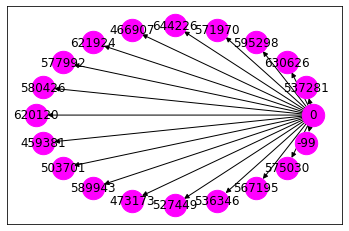

In [0]:
ego_net = nx.ego_graph(templateG, n=0)
print(nx.info(ego_net))
fig = plt.Figure(figsize=(30,30))
pos=nx.shell_layout(ego_net)

nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')

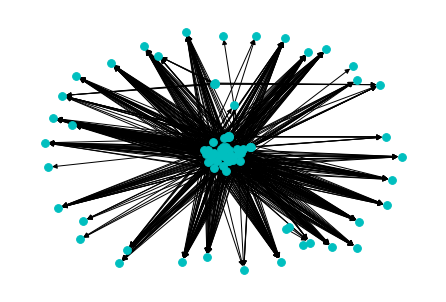

number of nodes:  88
number of edges:  859


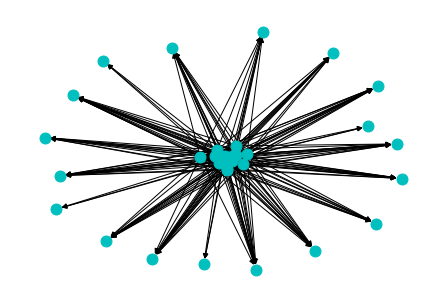

In [0]:
fig = plt.Figure(figsize=(30,30))
# Copy a graph model
G = templateG
# Let's draw the graph
pos= nx.spring_layout(G)
nx.draw(G, pos, node_color='c', node_size=60 ,with_labels=False)
plt.show()
# find node with largest degree
node_degree = G.degree()
# calculate number of nodes
print("number of nodes: ", G.order())
# calculate number of edges
print("number of edges: ", G.size())
# find node with the largest degree
node_degree= G.degree()
series = pd.Series(dict(node_degree))
largest_deg = series.idxmax()
degree = series.max()
# Create ego graph of node with the largest degree
node_ego= nx.ego_graph(G,largest_deg)
# Draw ego graph
pos= nx.spring_layout(node_ego)
nx.draw(node_ego, pos, node_color='c', node_size=120, with_labels=False)
plt.show()

In [0]:
#TODO
#Add the Ego Network with two hops

#### 

In [0]:
max([y for x, y in node_degree])

47

In [0]:
series = pd.Series(dict(node_degree))
series.idxmax()
series.max()

47

In [0]:
node_degree

DiDegreeView({0: 23, -99: 1, 41: 47, 34: 34, 37: 35, 27: 38, 40: 31, 39: 29, 65: 30, 67: 5, 47: 37, 66: 1, 657187: 2, 78: 4, 81: 7, 80: 4, 70: 13, 43: 36, 56: 36, 57: 35, 58: 34, 63: 37, 77: 4, 79: 4, 45: 40, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19})

#### Degree Centrality

In [0]:
degree_centralityTemplate = nx.degree_centrality(templateG)
degree_centralityGraph1 = nx.degree_centrality(graph1G)
degree_centralityGraph2 = nx.degree_centrality(graph2G)
degree_centralityGraph3 = nx.degree_centrality(graph3G)
degree_centralityGraph4 = nx.degree_centrality(graph4G)
degree_centralityGraph5 = nx.degree_centrality(graph5G)
degree_centralitySeed1 = nx.degree_centrality(seed1G)
degree_centralitySeed2 = nx.degree_centrality(seed2G)
degree_centralitySeed3 = nx.degree_centrality(seed3G)

In [248]:
print(degree_centralityGraph5)

{619322: 0.8470588235294118, 590442: 0.011764705882352941, 594308: 0.5882352941176471, 549840: 0.32941176470588235, 524153: 0.6235294117647059, 629769: 0.011764705882352941, 461577: 0.011764705882352941, 547205: 0.011764705882352941, 483784: 0.5764705882352941, 631903: 0.32941176470588235, 549891: 0.047058823529411764, 632485: 0.011764705882352941, 657173: 0.11764705882352941, 477657: 0.6235294117647059, 620947: 0.011764705882352941, 492039: 0.023529411764705882, 616453: 0.3529411764705882, 483999: 0.023529411764705882, 644754: 0.011764705882352941, 525263: 0.011764705882352941, 532852: 0.011764705882352941, 625756: 0.11764705882352941, 517649: 0.011764705882352941, 509607: 0.29411764705882354, 587437: 0.011764705882352941, 623736: 0.011764705882352941, 493358: 0.03529411764705882, 561819: 0.38823529411764707, 561157: 0.3529411764705882, 530990: 0.32941176470588235, 643087: 0.011764705882352941, 569044: 0.011764705882352941, 556592: 0.011764705882352941, 585589: 0.011764705882352941, 5

In [0]:
degreeTemplate = degree_centralityTemplate
degreeGraph1 = degree_centralityGraph1
degreeGraph2 = degree_centralityGraph2
degreeGraph3 = degree_centralityGraph3
degreeGraph4 = degree_centralityGraph4
degreeGraph5 = degree_centralityGraph5
degreeSeed1 = degree_centralitySeed1
degreeSeed2 = degree_centralitySeed2
degreeSeed3 = degree_centralitySeed3

In [250]:
type(degreeTemplate)

dict

##### ranges 

In [251]:
print("closeness centrality erange for All channel in Template: ",
      min(list(degreeTemplate.values())), 
      max(list(degreeTemplate.values())))

print("closeness centrality range for All channel in graph 1: ",
      min(list(degreeGraph1.values())), 
      max(list(degreeGraph1.values())))

print("closeness centrality range for All channel in graph 2: ",
      min(list(degreeGraph2.values())), 
      max(list(degreeGraph2.values())))

print("closeness centrality range for All channel in graph 3: ",
      min(list(degreeGraph3.values())), 
      max(list(degreeGraph3.values())))

print("closeness centrality range for All channel in graph 4: ",
      min(list(degreeGraph4.values())), 
      max(list(degreeGraph4.values())))

print("closeness centrality range for All channel in graph 5: ",
      min(list(degreeGraph5.values())), 
      max(list(degreeGraph5.values())))

print("closeness centrality range for All channel in graph seed 1: ",
      min(list(degreeSeed1.values())), 
      max(list(degreeSeed1.values())))

print("closeness centrality range for All channel in graph seed 2: ",
      min(list(degreeSeed2.values())), 
      max(list(degreeSeed2.values())))

print("closeness centrality range for All channel in graph seed 3: ",
      min(list(degreeSeed3.values())), 
      max(list(degreeSeed3.values())))


closeness centrality erange for All channel in Template:  0.011494252873563218 2.390804597701149
closeness centrality range for All channel in graph 1:  0.010869565217391304 1.467391304347826
closeness centrality range for All channel in graph 2:  0.011627906976744186 2.2325581395348837
closeness centrality range for All channel in graph 3:  0.01282051282051282 0.8717948717948718
closeness centrality range for All channel in graph 4:  0.011627906976744186 0.7441860465116279
closeness centrality range for All channel in graph 5:  0.011764705882352941 0.8470588235294118
closeness centrality range for All channel in graph seed 1:  0.046511627906976744 5.465116279069767
closeness centrality range for All channel in graph seed 2:  0.031578947368421054 0.9052631578947368
closeness centrality range for All channel in graph seed 3:  0.038461538461538464 2.1346153846153846


In [0]:
dict(degreeTemplate)

In [252]:
measureTemplate = list(dict(degreeTemplate).values())
measureGraph1 = list(dict(degreeGraph1).values())
measureGraph2 = list(dict(degreeGraph2).values())
measureGraph3 = list(dict(degreeGraph3).values())
measureGraph4 = list(dict(degreeGraph4).values())
measureGraph5 = list(dict(degreeGraph5).values())
measureSeed1 = list(dict(degreeSeed1).values())
measureSeed2 = list(dict(degreeSeed2).values())
measureSeed3 = list(dict(degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for degree centrality")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/degreeCentrality_All_Box_Graphs.html')


fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for degree centrality")
fig.show()

fig.write_html('drive/My Drive/GraphsMay/degreeCentrality_All_Box_Seeds.html')

##### WasserStein distance 

In [253]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph5).values())))
print("wasserstein distance between Template and Seed 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed1).values())))
print("wasserstein distance between Template and Seed 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed2).values())))
print("wasserstein distance between Template and Seed 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed3).values())))

wasserstein distance between Template and Graph 1 is:  0.08291250879936377
wasserstein distance between Template and Graph 2 is:  0.07175060619188595
wasserstein distance between Template and Graph 3 is:  0.11087599291440406
wasserstein distance between Template and Graph 4 is:  0.150479332215499
wasserstein distance between Template and Graph 5 is:  0.23809334917170194
wasserstein distance between Template and Seed 1 is:  0.19455784792593134
wasserstein distance between Template and Seed 2 is:  0.27538978716383433
wasserstein distance between Template and Seed 3 is:  0.11843931659318777


In [0]:
wsG1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [260]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.08291250879936377 0.07175060619188595 0.11087599291440406 0.150479332215499 0.23809334917170194 0.19455784792593134 0.27538978716383433 0.11843931659318777


In [257]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='WasserStein Distace between Template and Q1 graphs and seed graphs (closeness centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/degreeCentrality_WasserStein_All_Bar.html')

##### energy distance 

In [0]:
'''print("energy distance between Template and Graph 1 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph1).values())))
print("energy distance between Template and Graph 2 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph2).values())))
print("energy distance between Template and Graph 3 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph3).values())))
print("energy distance between Template and Graph 4 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph4).values())))
print("energy distance between Template and Graph 5 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph5).values())))'''

In [0]:
wsG1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [263]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.10326125845228859 0.09712276578323793 0.13321606392317173 0.18139363639742512 0.36138718097297423 0.14978815777424379 0.4441663958821213 0.14955995615509995


In [264]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Energy Distace between Template and Q1 graphs and seed graphs(closeness centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/degreeCentrality_Energy_All_Bar.html')

##### Histograms 

In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(dict(degreeTemplate).values()))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="closeness centrality Distributions")

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/degreeCentrality_All_simpleHist.html')

In [268]:
# Add histogram data
df = pd.DataFrame(list(dict(degreeTemplate).values()))
x1 = df[0]

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x2 = df[0]

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x3 = df[0]

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x4 = df[0]

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x5 = df[0]

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x6 = df[0]

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x7 = df[0]

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x8 = df[0]

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 2', 'Seed 3']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.update_layout(title_text="Out Degree Distributions Curves")

fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/degreeCentrality_All_curveHist.html')

##### previous

In [0]:
print("degree centrality range for All channel in Template: ",
      min(list(degree_centralityTemplate.values())), 
      max(list(degree_centralityTemplate.values())))

print("degree centrality range for All channel in graph 1: ",
      min(list(degree_centralityGraph1.values())), 
      max(list(degree_centralityGraph1.values())))

print("degree centrality range for All channel in graph 2: ",
      min(list(degree_centralityGraph2.values())), 
      max(list(degree_centralityGraph2.values())))

print("degree centrality range for All channel in graph 3: ",
      min(list(degree_centralityGraph3.values())), 
      max(list(degree_centralityGraph3.values())))

print("degree centrality range for All channel in graph 4: ",
      min(list(degree_centralityGraph4.values())), 
      max(list(degree_centralityGraph4.values())))

print("degree centrality range for All channel in graph 5: ",
      min(list(degree_centralityGraph5.values())), 
      max(list(degree_centralityGraph5.values())))

degree centrality range for All channel in Template:  0.011494252873563218 2.390804597701149
degree centrality range for All channel in graph 1:  0.010869565217391304 1.467391304347826
degree centrality range for All channel in graph 2:  0.011627906976744186 2.2325581395348837
degree centrality range for All channel in graph 3:  0.01282051282051282 0.8717948717948718
degree centrality range for All channel in graph 4:  0.011627906976744186 0.7441860465116279
degree centrality range for All channel in graph 5:  0.011764705882352941 0.8470588235294118


In [0]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [0]:
fig = make_subplots(rows=3, cols=2)

numberOfBins = 6
# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=numberOfBins)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=numberOfBins)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

numberOfBins = 6

df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, nbinsx=numberOfBins))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Closeness Centrality

In [0]:
closeness_centralityTemplate = nx.closeness_centrality(templateG)
closeness_centralityGraph1 = nx.closeness_centrality(graph1G)
closeness_centralityGraph2 = nx.closeness_centrality(graph2G)
closeness_centralityGraph3 = nx.closeness_centrality(graph3G)
closeness_centralityGraph4 = nx.closeness_centrality(graph4G)
closeness_centralityGraph5 = nx.closeness_centrality(graph5G)
closeness_centralitySeed1 = nx.closeness_centrality(seed1G)
closeness_centralitySeed2 = nx.closeness_centrality(seed2G)
closeness_centralitySeed3 = nx.closeness_centrality(seed3G)

In [0]:
degreeTemplate = closeness_centralityTemplate
degreeGraph1 = closeness_centralityGraph1
degreeGraph2 = closeness_centralityGraph2
degreeGraph3 = closeness_centralityGraph3
degreeGraph4 = closeness_centralityGraph4
degreeGraph5 = closeness_centralityGraph5
degreeSeed1 = closeness_centralitySeed1
degreeSeed2 = closeness_centralitySeed2
degreeSeed3 = closeness_centralitySeed3

In [224]:
type(degreeTemplate)

dict

##### ranges 

In [0]:
dict(zip([x for x, y in closeness_centralityTemplate.items()], [y for x, y in closeness_centralityTemplate.items()]))

In [158]:
print("out degre erange for All channel in Template: ",
      min(list(dict(degreeTemplate).values())), 
      max(list(dict(degreeTemplate).values())))

out degre erange for All channel in Template:  0.0 0.4179728317659352


In [152]:
print("closeness centrality erange for All channel in Template: ",
      min(list(degreeTemplate.values())), 
      max(list(degreeTemplate.values())))

print("closeness centrality range for All channel in graph 1: ",
      min(list(degreeGraph1.values())), 
      max(list(degreeGraph1.values())))

print("closeness centrality range for All channel in graph 2: ",
      min(list(degreeGraph2.values())), 
      max(list(degreeGraph2.values())))

print("closeness centrality range for All channel in graph 3: ",
      min(list(degreeGraph3.values())), 
      max(list(degreeGraph3.values())))

print("closeness centrality range for All channel in graph 4: ",
      min(list(degreeGraph4.values())), 
      max(list(degreeGraph4.values())))

print("closeness centrality range for All channel in graph 5: ",
      min(list(degreeGraph5.values())), 
      max(list(degreeGraph5.values())))

print("closeness centrality range for All channel in graph seed 1: ",
      min(list(degreeSeed1.values())), 
      max(list(degreeSeed1.values())))

print("closeness centrality range for All channel in graph seed 2: ",
      min(list(degreeSeed2.values())), 
      max(list(degreeSeed2.values())))

print("closeness centrality range for All channel in graph seed 3: ",
      min(list(degreeSeed3.values())), 
      max(list(degreeSeed3.values())))


centrality closeness erange for All channel in Template:  0.0 0.4179728317659352
centrality closeness range for All channel in graph 1:  0.0 0.4816053511705686
centrality closeness range for All channel in graph 2:  0.0 0.49209302325581394
centrality closeness range for All channel in graph 3:  0.0 0.34547908232118757
centrality closeness range for All channel in graph 4:  0.0 0.2940735183795949
centrality closeness range for All channel in graph 5:  0.0 0.12426470588235294
centrality closeness range for All channel in graph seed 1:  0.4883720930232558 0.9540292049756625
centrality closeness range for All channel in graph seed 2:  0.0 0.10526315789473684
centrality closeness range for All channel in graph seed 3:  0.47637362637362635 0.9094405594405593


In [0]:
dict(degreeTemplate)

In [287]:
measureTemplate = list(dict(degreeTemplate).values())
measureGraph1 = list(dict(degreeGraph1).values())
measureGraph2 = list(dict(degreeGraph2).values())
measureGraph3 = list(dict(degreeGraph3).values())
measureGraph4 = list(dict(degreeGraph4).values())
measureGraph5 = list(dict(degreeGraph5).values())
measureSeed1 = list(dict(degreeSeed1).values())
measureSeed2 = list(dict(degreeSeed2).values())
measureSeed3 = list(dict(degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for closeness centrality")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/closenessCentrality_All_Box_Graphs.html')


fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for closeness centrality")
fig.show()

fig.write_html('drive/My Drive/GraphsMay/closenessCentrality_All_Box_Seeds.html')

##### WasserStein distance 

In [234]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph5).values())))
print("wasserstein distance between Template and Seed 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed1).values())))
print("wasserstein distance between Template and Seed 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed2).values())))
print("wasserstein distance between Template and Seed 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed3).values())))

wasserstein distance between Template and Graph 1 is:  0.016467740277336454
wasserstein distance between Template and Graph 2 is:  0.028321538882043463
wasserstein distance between Template and Graph 3 is:  0.025285135043380834
wasserstein distance between Template and Graph 4 is:  0.0684928566148261
wasserstein distance between Template and Graph 5 is:  0.1101201561957539
wasserstein distance between Template and Seed 1 is:  0.38120653450170844
wasserstein distance between Template and Seed 2 is:  0.126376948048072
wasserstein distance between Template and Seed 3 is:  0.36364802138677477


In [0]:
wsG1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [229]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.016467740277336454 0.028321538882043463 0.025285135043380834 0.0684928566148261 0.1101201561957539 0.38120653450170844 0.126376948048072 0.36364802138677477


In [231]:
colors = ['lightslategray',] * 7
colors[0: 2] = ['crimson', ] * 3
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='WasserStein Distace between Template and Q1 graphs and seed graphs (closeness centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/closenessCentrality_WasserStein_All_Bar.html')

##### energy distance 

In [179]:
print("energy distance between Template and Graph 1 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph1).values())))
print("energy distance between Template and Graph 2 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph2).values())))
print("energy distance between Template and Graph 3 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph3).values())))
print("energy distance between Template and Graph 4 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph4).values())))
print("energy distance between Template and Graph 5 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph5).values())))

energy distance between Template and Graph 1 is:  0.627996424790891
energy distance between Template and Graph 2 is:  0.50845781222607
energy distance between Template and Graph 3 is:  0.9417375499064156
energy distance between Template and Graph 4 is:  1.1961525802689876
energy distance between Template and Graph 5 is:  2.173300691547989


In [0]:
wsG1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [236]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.04213192511513912 0.06359832715150794 0.07209802696079688 0.17427210513158742 0.28643298776881343 0.7489469571926405 0.3357049593262638 0.7399206063523839


In [237]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Energy Distace between Template and Q1 graphs and seed graphs(closeness centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/closenessCentrality_Energy_All_Bar.html')

##### Histograms 

In [242]:
df = pd.DataFrame(list(dict(degreeTemplate).values()))
x = df[0]
print(x)

0     0.164041
1     0.121383
2     0.187146
3     0.168194
4     0.225209
        ...   
83    0.011494
84    0.195562
85    0.022989
86    0.022989
87    0.022989
Name: 0, Length: 88, dtype: float64


In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(dict(degreeTemplate).values()))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="closeness centrality Distributions")

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/closenessCentrality_All_simpleHist.html')

In [245]:
# Add histogram data
df = pd.DataFrame(list(dict(degreeTemplate).values()))
x1 = df[0]

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x2 = df[0]

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x3 = df[0]

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x4 = df[0]

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x5 = df[0]

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x6 = df[0]

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x7 = df[0]

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x8 = df[0]

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 2', 'Seed 3']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.update_layout(title_text="Out Degree Distributions Curves")

fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/closenessCentrality_All_curveHist.html')

##### previous

In [0]:
print(closeness_centralityGraph5)
sum(list(closeness_centralityTemplate.values()))

{619322: 0.08067226890756302, 590442: 0.05847750865051903, 594308: 0.05841784989858012, 549840: 0.06776470588235294, 524153: 0.06515837104072399, 629769: 0.050980392156862744, 461577: 0.050980392156862744, 547205: 0.05847750865051903, 483784: 0.08067226890756302, 631903: 0.08067226890756302, 549891: 0.05847750865051903, 632485: 0.050980392156862744, 657173: 0.05847750865051903, 477657: 0.07365728900255754, 620947: 0.050980392156862744, 492039: 0.06855983772819474, 616453: 0.08284313725490196, 483999: 0.06855983772819474, 644754: 0.050980392156862744, 525263: 0.050980392156862744, 532852: 0.05847750865051903, 625756: 0.07100840336134455, 517649: 0.050980392156862744, 509607: 0.07647058823529412, 587437: 0.050980392156862744, 623736: 0.050980392156862744, 493358: 0.05847750865051903, 561819: 0.08916408668730649, 561157: 0.07647058823529412, 530990: 0.08916408668730649, 643087: 0.050980392156862744, 569044: 0.05847750865051903, 556592: 0.050980392156862744, 585589: 0.050980392156862744, 5

13.462339002338013

In [0]:
print("centrality closeness range for All channel in Template: ",
      min(list(closeness_centralityTemplate.values())), 
      max(list(closeness_centralityTemplate.values())))

print("centrality closeness range for All channel in graph 1: ",
      min(list(closeness_centralityGraph1.values())), 
      max(list(closeness_centralityGraph1.values())))

print("centrality closeness range for All channel in graph 2: ",
      min(list(closeness_centralityGraph2.values())), 
      max(list(closeness_centralityGraph2.values())))

print("centrality closeness range for All channel in graph 3: ",
      min(list(closeness_centralityGraph3.values())), 
      max(list(closeness_centralityGraph3.values())))

print("centrality closeness range for All channel in graph 4: ",
      min(list(closeness_centralityGraph4.values())), 
      max(list(closeness_centralityGraph4.values())))

print("centrality closeness range for All channel in graph 5: ",
      min(list(closeness_centralityGraph5.values())), 
      max(list(closeness_centralityGraph5.values())))

centrality closeness range for All channel in Template:  0.0 0.4179728317659352
centrality closeness range for All channel in graph 1:  0.0 0.4816053511705686
centrality closeness range for All channel in graph 2:  0.0 0.49209302325581394
centrality closeness range for All channel in graph 3:  0.0 0.34547908232118757
centrality closeness range for All channel in graph 4:  0.0 0.2940735183795949
centrality closeness range for All channel in graph 5:  0.0 0.12426470588235294


In [0]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Betweenness Centrality
not for multi-graph

In [0]:
betweenness_centralityTemplate = nx.betweenness_centrality(templateG, normalized=False)
betweenness_centralityGraph1 = nx.betweenness_centrality(graph1G, normalized=False)
betweenness_centralityGraph2 = nx.betweenness_centrality(graph2G, normalized=False)
betweenness_centralityGraph3 = nx.betweenness_centrality(graph3G, normalized=False)
betweenness_centralityGraph4 = nx.betweenness_centrality(graph4G, normalized=False)
betweenness_centralityGraph5 = nx.betweenness_centrality(graph5G, normalized=False)
betweenness_centralitySeed1 = nx.betweenness_centrality(seed1G, normalized=False)
betweenness_centralitySeed2 = nx.betweenness_centrality(seed2G, normalized=False)
betweenness_centralitySeed3 = nx.betweenness_centrality(seed3G, normalized=False)

In [0]:
print(dict(betweenness_centralityGraph5))

In [0]:
degreeTemplate = betweenness_centralityTemplate
degreeGraph1 = betweenness_centralityGraph1
degreeGraph2 = betweenness_centralityGraph2
degreeGraph3 = betweenness_centralityGraph3
degreeGraph4 = betweenness_centralityGraph4
degreeGraph5 = betweenness_centralityGraph5
degreeSeed1 = betweenness_centralitySeed1
degreeSeed2 = betweenness_centralitySeed2
degreeSeed3 = betweenness_centralitySeed3

In [0]:
type(degreeTemplate)

dict

##### ranges 

In [345]:
print("betweenness centrality erange for All channel in Template: ",
      min(list(degreeTemplate.values())), 
      max(list(degreeTemplate.values())))

print("betweenness centrality range for All channel in graph 1: ",
      min(list(degreeGraph1.values())), 
      max(list(degreeGraph1.values())))

print("betweenness centrality range for All channel in graph 2: ",
      min(list(degreeGraph2.values())), 
      max(list(degreeGraph2.values())))

print("betweenness centrality range for All channel in graph 3: ",
      min(list(degreeGraph3.values())), 
      max(list(degreeGraph3.values())))

print("betweenness centrality range for All channel in graph 4: ",
      min(list(degreeGraph4.values())), 
      max(list(degreeGraph4.values())))

print("betweenness centrality range for All channel in graph 5: ",
      min(list(degreeGraph5.values())), 
      max(list(degreeGraph5.values())))

print("betweenness centrality range for All channel in graph seed 1: ",
      min(list(degreeSeed1.values())), 
      max(list(degreeSeed1.values())))

print("betweenness centrality range for All channel in graph seed 2: ",
      min(list(degreeSeed2.values())), 
      max(list(degreeSeed2.values())))

print("betweenness centrality range for All channel in graph seed 3: ",
      min(list(degreeSeed3.values())), 
      max(list(degreeSeed3.values())))


betweenness centrality erange for All channel in Template:  0.0 690.9019841269841
betweenness centrality range for All channel in graph 1:  0.0 1021.3388888888888
betweenness centrality range for All channel in graph 2:  0.0 907.0600950906678
betweenness centrality range for All channel in graph 3:  0.0 476.9
betweenness centrality range for All channel in graph 4:  0.0 918.0972312001725
betweenness centrality range for All channel in graph 5:  0.0 339.34166666666664
betweenness centrality range for All channel in graph seed 1:  0.0 1060.104761904762
betweenness centrality range for All channel in graph seed 2:  0.0 0.0
betweenness centrality range for All channel in graph seed 3:  0.0 1865.2014164524844


In [0]:
dict(degreeTemplate)

In [346]:
measureTemplate = list(dict(degreeTemplate).values())
measureGraph1 = list(dict(degreeGraph1).values())
measureGraph2 = list(dict(degreeGraph2).values())
measureGraph3 = list(dict(degreeGraph3).values())
measureGraph4 = list(dict(degreeGraph4).values())
measureGraph5 = list(dict(degreeGraph5).values())
measureSeed1 = list(dict(degreeSeed1).values())
measureSeed2 = list(dict(degreeSeed2).values())
measureSeed3 = list(dict(degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for betweenness centrality")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/betweennessCentrality_All_Box_Graphs.html')


fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for betweenness centrality")
fig.show()

fig.write_html('drive/My Drive/GraphsMay/betweennessCentrality_All_Box_Seeds.html')

##### WasserStein distance 

In [347]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph5).values())))
print("wasserstein distance between Template and Seed 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed1).values())))
print("wasserstein distance between Template and Seed 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed2).values())))
print("wasserstein distance between Template and Seed 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed3).values())))

wasserstein distance between Template and Graph 1 is:  10.886229249675456
wasserstein distance between Template and Graph 2 is:  12.515753788489576
wasserstein distance between Template and Graph 3 is:  7.335006769567729
wasserstein distance between Template and Graph 4 is:  18.968423493105014
wasserstein distance between Template and Graph 5 is:  7.9011547200520695
wasserstein distance between Template and Seed 1 is:  19.696489240564144
wasserstein distance between Template and Seed 2 is:  19.988636363636353
wasserstein distance between Template and Seed 3 is:  33.83806156441171


In [0]:
wsG1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [349]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

10.886229249675456 12.515753788489576 7.335006769567729 18.968423493105014 7.9011547200520695 19.696489240564144 19.988636363636353 33.83806156441171


In [364]:
colors = ['lightslategray',] * 7
colors[2] = 'crimson'
colors[4] = 'crimson'
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='WasserStein Distace between Template and Q1 graphs and seed graphs (betweenness centrality)')

'lightslategray'

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/closenessCentrality_WasserStein_All_Bar.html')

##### energy distance 

In [0]:
print("energy distance between Template and Graph 1 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph1).values())))
print("energy distance between Template and Graph 2 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph2).values())))
print("energy distance between Template and Graph 3 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph3).values())))
print("energy distance between Template and Graph 4 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph4).values())))
print("energy distance between Template and Graph 5 is: ", 
      energy_distance(list(dict((x, y) for x, y in degreeTemplate).values()), 
                           list(dict((x, y) for x, y in degreeGraph5).values())))

energy distance between Template and Graph 1 is:  0.627996424790891
energy distance between Template and Graph 2 is:  0.50845781222607
energy distance between Template and Graph 3 is:  0.9417375499064156
energy distance between Template and Graph 4 is:  1.1961525802689876
energy distance between Template and Graph 5 is:  2.173300691547989


In [0]:
wsG1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [366]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.5944004926287489 0.8316240677495282 0.5910135227823722 1.1235764050479096 0.7960127313367994 0.9950110116050668 1.8822787230901545 1.906247505398357


In [368]:
colors = ['lightslategray',] * 7
colors[0] = 'crimson'
colors[2] = 'crimson'
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Energy Distace between Template and Q1 graphs and seed graphs(betweenness centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/betweennessCentrality_Energy_All_Bar.html')

##### Histograms 

In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(dict(degreeTemplate).values()))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="betweenness centrality Distributions")

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/betweennessCentrality_All_simpleHist.html')

In [373]:
# Add histogram data
df = pd.DataFrame(list(dict(degreeTemplate).values()))
x1 = df[0]

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x2 = df[0]

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x3 = df[0]

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x4 = df[0]

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x5 = df[0]

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x6 = df[0]

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x7 = df[0]

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x8 = df[0]

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 3']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.update_layout(title_text="betweenness Distributions Curves")

fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/betweennessCentrality_All_curveHist.html')

##### previous

In [0]:
print("centrality betweenness range for All channel in Template: ",
      min(list(betweenness_centralityTemplate.values())), 
      max(list(betweenness_centralityTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(betweenness_centralityGraph1.values())), 
      max(list(betweenness_centralityGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(betweenness_centralityGraph2.values())), 
      max(list(betweenness_centralityGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(betweenness_centralityGraph3.values())), 
      max(list(betweenness_centralityGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(betweenness_centralityGraph4.values())), 
      max(list(betweenness_centralityGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralityGraph5.values())), 
      max(list(betweenness_centralityGraph5.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralitySeed1.values())), 
      max(list(betweenness_centralitySeed1.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralitySeed2.values())), 
      max(list(betweenness_centralitySeed2.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralitySeed3.values())), 
      max(list(betweenness_centralitySeed3.values())))



centrality betweenness range for All channel in Template:  0.0 65.3281746031746
centrality betweenness range for All channel in graph 1:  0.0 202.73333333333332
centrality betweenness range for All channel in graph 2:  0.0 142.78333333333333
centrality betweenness range for All channel in graph 3:  0.0 54.33333333333333
centrality betweenness range for All channel in graph 4:  0.0 178.75
centrality betweenness range for All channel in graph 5:  0.0 1831.9514164524846
centrality betweenness range for All channel in graph 5:  0.0 1060.104761904762
centrality betweenness range for All channel in graph 5:  0.0 0.0
centrality betweenness range for All channel in graph 5:  0.0 1865.2014164524844


In [342]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in betweenness_centralityTemplate.items()], 
                           [y for x, y in betweenness_centralityGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  10.886229249675456
wasserstein distance between Template and Graph 2 is:  12.515753788489576
wasserstein distance between Template and Graph 3 is:  7.335006769567729
wasserstein distance between Template and Graph 4 is:  18.968423493105014
wasserstein distance between Template and Graph 5 is:  7.9011547200520695


In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)


df = pd.DataFrame(list(zip([y for x, y in betweenness_centralitySeed1.items()], [x for x, y in betweenness_centralitySeed1.items()])))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralitySeed2.items()], [x for x, y in betweenness_centralitySeed2.items()])))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralitySeed3.items()], [x for x, y in betweenness_centralitySeed3.items()])))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="Stacked Subplots")


fig.update_layout(barmode='overlay')
fig.show()

In [0]:
import plotly.figure_factory as ff
import numpy as np

measureTemplate = betweenness_centralityTemplate
measureGraph1 = betweenness_centralityGraph1
measureGraph2 = betweenness_centralityGraph2
measureGraph3 = betweenness_centralityGraph3
measureGraph4 = betweenness_centralityGraph4
measureGraph5 = betweenness_centralityGraph5
measureSeed1 = betweenness_centralitySeed1
measureSeed2 = betweenness_centralitySeed2
measureSeed3 = betweenness_centralitySeed3

# Add histogram data
df = pd.DataFrame(list(zip([y for x, y in measureTemplate.items()], [x for x, y in measureTemplate.items()])))
x1 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph1.items()], [x for x, y in measureGraph1.items()])))
x2 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph2.items()], [x for x, y in measureGraph2.items()])))
x3 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph3.items()], [x for x, y in measureGraph3.items()])))
x4 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph4.items()], [x for x, y in measureGraph4.items()])))
x5 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph5.items()], [x for x, y in measureGraph5.items()])))
x6 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureSeed1.items()], [x for x, y in measureSeed1.items()])))
x7 = df[0]

#df = pd.DataFrame(list(zip([y for x, y in measureSeed2.items()], [x for x, y in measureSeed2.items()])))
x8 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureSeed3.items()], [x for x, y in measureSeed3.items()])))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 2', 'Seed 3']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.show()

In [0]:
sorted(df[0], reverse=True)

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


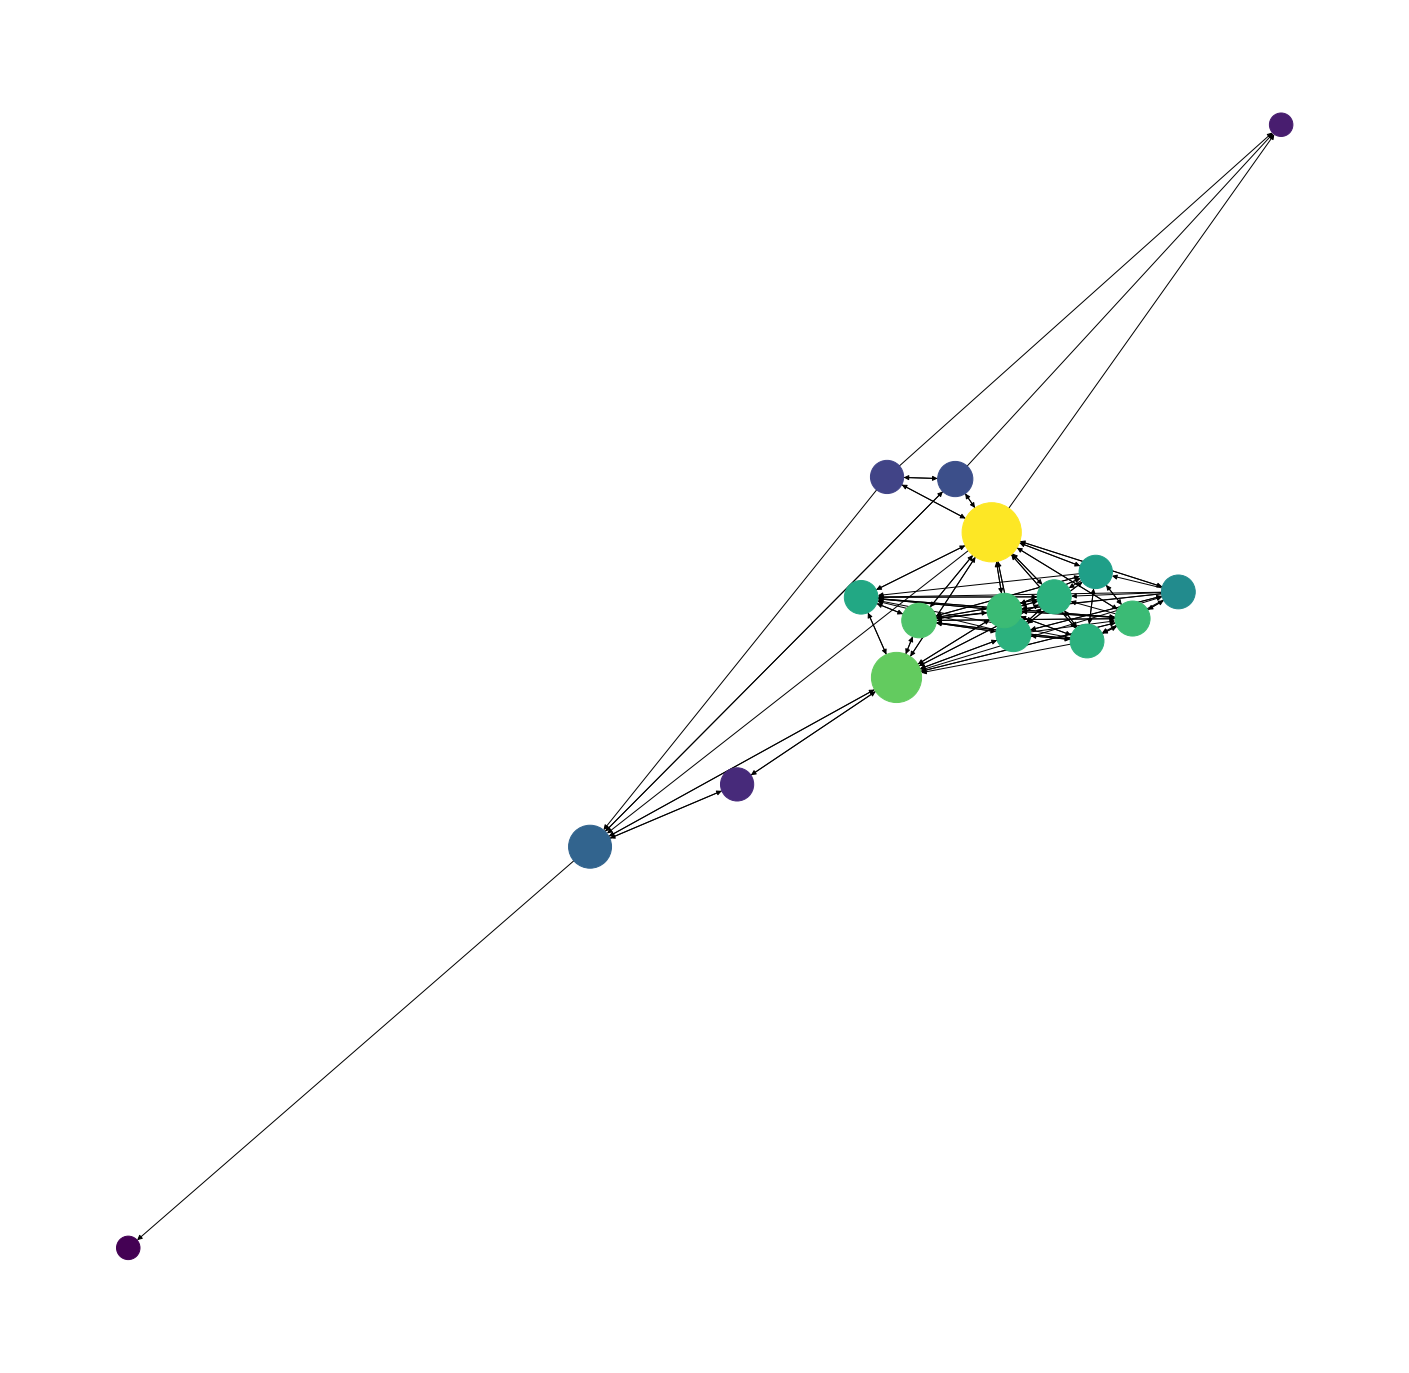

In [0]:
pos = nx.spring_layout(templateG)
betCent = nx.betweenness_centrality(templateG, normalized=True, endpoints=True)
node_color = [20000.0 * templateG.degree(v) for v in templateG]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(25,25))
nx.draw_networkx(templateG, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()

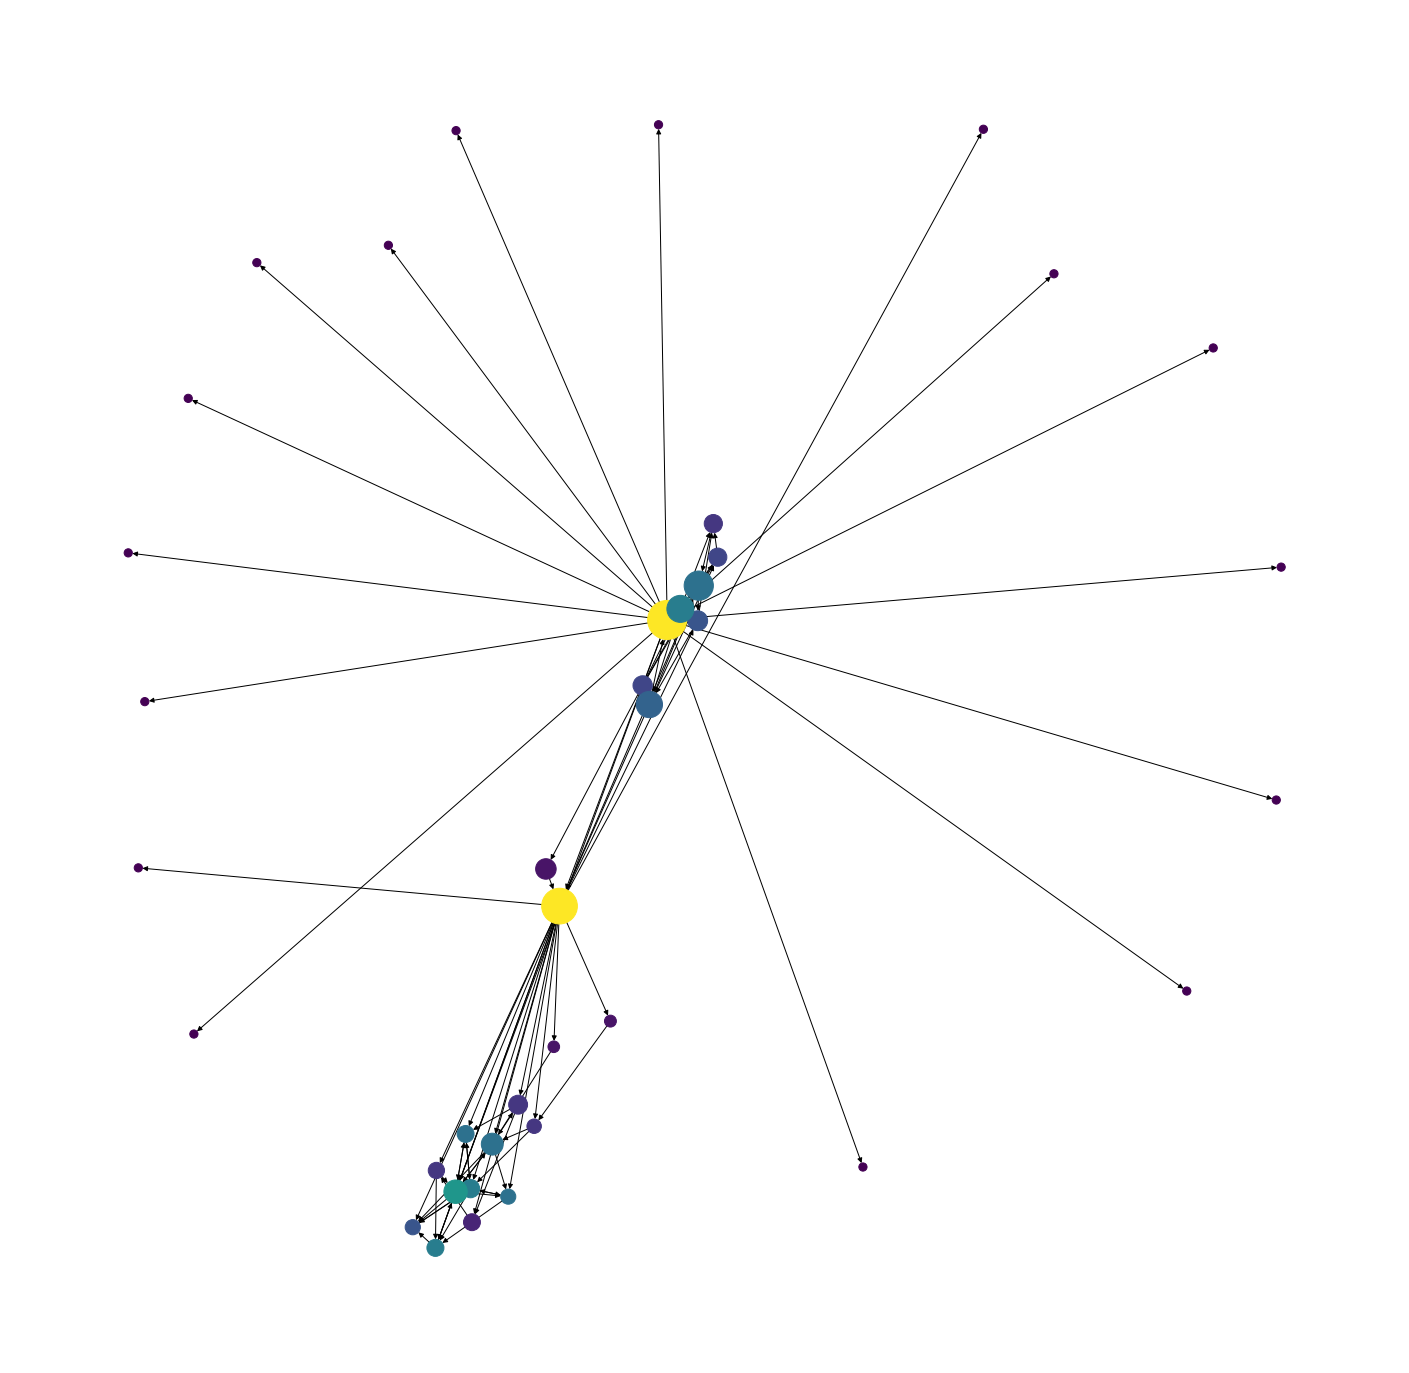

In [0]:
pos = nx.spring_layout(graph4G)
betCent = nx.betweenness_centrality(graph4G, normalized=True, endpoints=True)
node_color = [20000.0 * graph4G.degree(v) for v in graph4G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(25,25))
nx.draw_networkx(graph4G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()

#### Eigenvector Centrality
not for multi-graph

In [0]:
eigenvector_centralityTemplate = nx.eigenvector_centrality(templateG)
eigenvector_centralityGraph1 = nx.eigenvector_centrality(graph1G)
eigenvector_centralityGraph2 = nx.eigenvector_centrality(graph2G)
eigenvector_centralityGraph3 = nx.eigenvector_centrality(graph3G)
eigenvector_centralityGraph4 = nx.eigenvector_centrality(graph4G)
eigenvector_centralityGraph5 = nx.eigenvector_centrality(graph5G)
eigenvector_centralitySeed1 = nx.eigenvector_centrality(seed1G)
eigenvector_centralitySeed2 = nx.eigenvector_centrality(seed2G)
eigenvector_centralitySeed3 = nx.eigenvector_centrality(seed3G)

In [376]:
print(eigenvector_centralityGraph5)

{619322: 0.10383018030300545, 590442: 0.039398201977200134, 594308: 0.025213696604900415, 549840: 0.04030735557347389, 524153: 0.045538580897792356, 629769: 0.017279145197059975, 461577: 0.017279145197059975, 547205: 0.039398201977200134, 483784: 0.08101340684665558, 631903: 0.07970555680707175, 549891: 0.039398201977200134, 632485: 0.017279145197059975, 657173: 0.039398201977200134, 477657: 0.055105939162946684, 620947: 0.017279145197059975, 492039: 0.0566773471305188, 616453: 0.07781009108065878, 483999: 0.0566773471305188, 644754: 0.017279145197059975, 525263: 0.017279145197059975, 532852: 0.039398201977200134, 625756: 0.06030818280738595, 517649: 0.017279145197059975, 509607: 0.056900110250472966, 587437: 0.017279145197059975, 623736: 0.017279145197059975, 493358: 0.030243876413505334, 561819: 0.09720931826843256, 561157: 0.061217335003937785, 530990: 0.09485577490812327, 643087: 0.017279145197059975, 569044: 0.039398201977200134, 556592: 0.017279145197059975, 585589: 0.01727914519

In [0]:
degreeTemplate = eigenvector_centralityTemplate
degreeGraph1 = eigenvector_centralityGraph1
degreeGraph2 = eigenvector_centralityGraph2
degreeGraph3 = eigenvector_centralityGraph3
degreeGraph4 = eigenvector_centralityGraph4
degreeGraph5 = eigenvector_centralityGraph5
degreeSeed1 = eigenvector_centralitySeed1
degreeSeed2 = eigenvector_centralitySeed2
degreeSeed3 = eigenvector_centralitySeed3

##### ranges 

In [16]:
print("eigenvector centrality erange for All channel in Template: ",
      min(list(degreeTemplate.values())), 
      max(list(degreeTemplate.values())))

print("eigenvector centrality range for All channel in graph 1: ",
      min(list(degreeGraph1.values())), 
      max(list(degreeGraph1.values())))

print("eigenvector centrality range for All channel in graph 2: ",
      min(list(degreeGraph2.values())), 
      max(list(degreeGraph2.values())))

print("eigenvector centrality range for All channel in graph 3: ",
      min(list(degreeGraph3.values())), 
      max(list(degreeGraph3.values())))

print("eigenvector centrality range for All channel in graph 4: ",
      min(list(degreeGraph4.values())), 
      max(list(degreeGraph4.values())))

print("eigenvector centrality range for All channel in graph 5: ",
      min(list(degreeGraph5.values())), 
      max(list(degreeGraph5.values())))

print("eigenvector centrality range for All channel in graph seed 1: ",
      min(list(degreeSeed1.values())), 
      max(list(degreeSeed1.values())))

print("eigenvector centrality range for All channel in graph seed 2: ",
      min(list(degreeSeed2.values())), 
      max(list(degreeSeed2.values())))

print("eigenvector centrality range for All channel in graph seed 3: ",
      min(list(degreeSeed3.values())), 
      max(list(degreeSeed3.values())))


eigenvector centrality erange for All channel in Template:  1.579511993476117e-12 0.23104151401538972
eigenvector centrality range for All channel in graph 1:  1.3798859204184542e-15 0.2595320611385738
eigenvector centrality range for All channel in graph 2:  5.646663851563167e-15 0.2540732315812547
eigenvector centrality range for All channel in graph 3:  5.68140103184092e-16 0.24276720046888675
eigenvector centrality range for All channel in graph 4:  7.206219202893842e-20 0.2589122564239518
eigenvector centrality range for All channel in graph 5:  4.3741310169803516e-11 0.24424529389759264
eigenvector centrality range for All channel in graph seed 1:  0.038755701867420445 0.434166092391991
eigenvector centrality range for All channel in graph seed 2:  0.00028532939720568703 0.2656416687984944
eigenvector centrality range for All channel in graph seed 3:  0.05367103060519423 0.518597682852463


In [0]:
dict(degreeTemplate)

In [9]:
measureTemplate = list(dict(degreeTemplate).values())
measureGraph1 = list(dict(degreeGraph1).values())
measureGraph2 = list(dict(degreeGraph2).values())
measureGraph3 = list(dict(degreeGraph3).values())
measureGraph4 = list(dict(degreeGraph4).values())
measureGraph5 = list(dict(degreeGraph5).values())
measureSeed1 = list(dict(degreeSeed1).values())
measureSeed2 = list(dict(degreeSeed2).values())
measureSeed3 = list(dict(degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for eigenvector centrality")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/eigenvectorCentrality_All_Box_Graphs.html')


fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for eigenvector centrality")
fig.show()

fig.write_html('drive/My Drive/GraphsMay/eigenvectorCentrality_All_Box_Seeds.html')

##### WasserStein distance 

In [10]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph5).values())))
print("wasserstein distance between Template and Seed 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed1).values())))
print("wasserstein distance between Template and Seed 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed2).values())))
print("wasserstein distance between Template and Seed 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed3).values())))

wasserstein distance between Template and Graph 1 is:  0.009507371355268482
wasserstein distance between Template and Graph 2 is:  0.01413424604203363
wasserstein distance between Template and Graph 3 is:  0.01001467557191672
wasserstein distance between Template and Graph 4 is:  0.013627431266521535
wasserstein distance between Template and Graph 5 is:  0.01966314479364121
wasserstein distance between Template and Seed 1 is:  0.053898635473827075
wasserstein distance between Template and Seed 2 is:  0.053030033438086016
wasserstein distance between Template and Seed 3 is:  0.06396159897045339


In [0]:
wsG1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [12]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.009507371355268482 0.01413424604203363 0.01001467557191672 0.013627431266521535 0.01966314479364121 0.053898635473827075 0.053030033438086016 0.06396159897045339


In [18]:
colors = ['lightslategray',] * 7
colors[0] = 'crimson'
colors[2] = 'crimson'
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.4f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='WasserStein Distace between Template and Q1 graphs and seed graphs (eigenvector centrality)')

'lightslategray'

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/eigenvectorCentrality_WasserStein_All_Bar.html')

##### energy distance 

In [0]:
wsG1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [22]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.03232145296955471 0.044770990202216567 0.034997349884478814 0.059117576543358176 0.08557224444926682 0.1854312446245047 0.1914954499169196 0.2281368705078014


In [24]:
colors = ['lightslategray',] * 7
colors[0] = 'crimson'
colors[2] = 'crimson'
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.4f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Energy Distace between Template and Q1 graphs and seed graphs(eigenvector centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/eigenvectorCentrality_Energy_All_Bar.html')

##### Histograms 

In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(dict(degreeTemplate).values()))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="eigenvector centrality Distributions")

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/eigenvectorCentrality_All_simpleHist.html')

In [28]:
# Add histogram data
df = pd.DataFrame(list(dict(degreeTemplate).values()))
x1 = df[0]

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x2 = df[0]

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x3 = df[0]

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x4 = df[0]

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x5 = df[0]

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x6 = df[0]

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x7 = df[0]

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x8 = df[0]

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 3']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.update_layout(title_text="eigenvector Distributions Curves")

fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/eigenvectorCentrality_All_curveHist.html')

##### previous

In [0]:
print("centrality eigenvector range for All channel in Template: ",
      min(list(eigenvector_centralityTemplate.values())), 
      max(list(eigenvector_centralityTemplate.values())))

print("centrality eigenvector range for All channel in graph 1: ",
      min(list(eigenvector_centralityGraph1.values())), 
      max(list(eigenvector_centralityGraph1.values())))

print("centrality eigenvector range for All channel in graph 2: ",
      min(list(eigenvector_centralityGraph2.values())), 
      max(list(eigenvector_centralityGraph2.values())))

print("centrality eigenvector range for All channel in graph 3: ",
      min(list(eigenvector_centralityGraph3.values())), 
      max(list(eigenvector_centralityGraph3.values())))

print("centrality eigenvector range for All channel in graph 4: ",
      min(list(eigenvector_centralityGraph4.values())), 
      max(list(eigenvector_centralityGraph4.values())))

print("centrality eigenvector range for All channel in graph 5: ",
      min(list(eigenvector_centralityGraph5.values())), 
      max(list(eigenvector_centralityGraph5.values())))

In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityTemplate.items()], [x for x, y in eigenvector_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph1.items()], [x for x, y in eigenvector_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph2.items()], [x for x, y in eigenvector_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph3.items()], [x for x, y in eigenvector_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph4.items()], [x for x, y in eigenvector_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph5.items()], [x for x, y in eigenvector_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityTemplate.items()], [x for x, y in eigenvector_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph1.items()], [x for x, y in eigenvector_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph2.items()], [x for x, y in eigenvector_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph3.items()], [x for x, y in eigenvector_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph4.items()], [x for x, y in eigenvector_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in eigenvector_centralityGraph5.items()], [x for x, y in eigenvector_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


#### PageRank
not for multi-graph

In [0]:
pagerankTemplate = nx.pagerank(templateG)
pagerankGraph1 = nx.pagerank(graph1G)
pagerankGraph2 = nx.pagerank(graph2G)
pagerankGraph3 = nx.pagerank(graph3G)
pagerankGraph4 = nx.pagerank(graph4G)
pagerankGraph5 = nx.pagerank(graph5G)
pagerankSeed1 = nx.pagerank(seed1G)
pagerankSeed2 = nx.pagerank(seed2G)
pagerankSeed3 = nx.pagerank(seed3G)


In [31]:
print(pagerankGraph5)

{619322: 0.013038596887807473, 590442: 0.010209402779011036, 594308: 0.012824841904623062, 549840: 0.013343307274971718, 524153: 0.01316702031388485, 629769: 0.010142997842042633, 461577: 0.010142997842042633, 547205: 0.010209402779011036, 483784: 0.02396121680202285, 631903: 0.012238996817302603, 549891: 0.010209402779011036, 632485: 0.010142997842042633, 657173: 0.010209402779011036, 477657: 0.013570744420576836, 620947: 0.010142997842042633, 492039: 0.0104425496029522, 616453: 0.011573071866712317, 483999: 0.0104425496029522, 644754: 0.010142997842042633, 525263: 0.010142997842042633, 532852: 0.010209402779011036, 625756: 0.010733683247165792, 517649: 0.010142997842042633, 509607: 0.01104879139855756, 587437: 0.010142997842042633, 623736: 0.010142997842042633, 493358: 0.010405275524305972, 561819: 0.013072990439243913, 561157: 0.011621408193400583, 530990: 0.013619818171737132, 643087: 0.010142997842042633, 569044: 0.010209402779011036, 556592: 0.010142997842042633, 585589: 0.010142

In [0]:
degreeTemplate = pagerankTemplate
degreeGraph1 = pagerankGraph1
degreeGraph2 = pagerankGraph2
degreeGraph3 = pagerankGraph3
degreeGraph4 = pagerankGraph4
degreeGraph5 = pagerankGraph5
degreeSeed1 = pagerankSeed1
degreeSeed2 = pagerankSeed2
degreeSeed3 = pagerankSeed3

##### ranges 

In [33]:
print("pagerank range for All channel in Template: ",
      min(list(degreeTemplate.values())), 
      max(list(degreeTemplate.values())))

print("pagerank range for All channel in graph 1: ",
      min(list(degreeGraph1.values())), 
      max(list(degreeGraph1.values())))

print("pagerank range for All channel in graph 2: ",
      min(list(degreeGraph2.values())), 
      max(list(degreeGraph2.values())))

print("pagerank range for All channel in graph 3: ",
      min(list(degreeGraph3.values())), 
      max(list(degreeGraph3.values())))

print("pagerank range for All channel in graph 4: ",
      min(list(degreeGraph4.values())), 
      max(list(degreeGraph4.values())))

print("pagerank range for All channel in graph 5: ",
      min(list(degreeGraph5.values())), 
      max(list(degreeGraph5.values())))

print("pagerank range for All channel in graph seed 1: ",
      min(list(degreeSeed1.values())), 
      max(list(degreeSeed1.values())))

print("pagerank range for All channel in graph seed 2: ",
      min(list(degreeSeed2.values())), 
      max(list(degreeSeed2.values())))

print("pagerank range for All channel in graph seed 3: ",
      min(list(degreeSeed3.values())), 
      max(list(degreeSeed3.values())))


pagerank range for All channel in Template:  0.007015210702652491 0.03190918634421748
pagerank range for All channel in graph 1:  0.00662065714427669 0.031003826075076443
pagerank range for All channel in graph 2:  0.007137587339172741 0.026615098184428358
pagerank range for All channel in graph 3:  0.007972166980176493 0.03338617874644276
pagerank range for All channel in graph 4:  0.00852150325700428 0.019003082021513164
pagerank range for All channel in graph 5:  0.009909851018101469 0.02396121680202285
pagerank range for All channel in graph seed 1:  0.00663513662155054 0.15272199024407715
pagerank range for All channel in graph seed 2:  0.009569430064578588 0.014007130653323223
pagerank range for All channel in graph seed 3:  0.005834893759279416 0.1622151809782384


In [0]:
dict(degreeTemplate)

In [34]:
measureTemplate = list(dict(degreeTemplate).values())
measureGraph1 = list(dict(degreeGraph1).values())
measureGraph2 = list(dict(degreeGraph2).values())
measureGraph3 = list(dict(degreeGraph3).values())
measureGraph4 = list(dict(degreeGraph4).values())
measureGraph5 = list(dict(degreeGraph5).values())
measureSeed1 = list(dict(degreeSeed1).values())
measureSeed2 = list(dict(degreeSeed2).values())
measureSeed3 = list(dict(degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for PageRank")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/pageRank_All_Box_Graphs.html')


fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for PageRank")
fig.show()

fig.write_html('drive/My Drive/GraphsMay/pageRank_All_Box_Seeds.html')

##### WasserStein distance 

In [35]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph5).values())))
print("wasserstein distance between Template and Seed 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed1).values())))
print("wasserstein distance between Template and Seed 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed2).values())))
print("wasserstein distance between Template and Seed 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed3).values())))

wasserstein distance between Template and Graph 1 is:  0.000746943565355225
wasserstein distance between Template and Graph 2 is:  0.0007072478932058199
wasserstein distance between Template and Graph 3 is:  0.0013046421318182989
wasserstein distance between Template and Graph 4 is:  0.0015133923936583192
wasserstein distance between Template and Graph 5 is:  0.0026485006635318603
wasserstein distance between Template and Seed 1 is:  0.011415464647422982
wasserstein distance between Template and Seed 2 is:  0.0034681734836935424
wasserstein distance between Template and Seed 3 is:  0.007548828426679595


In [0]:
wsG1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [37]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.000746943565355225 0.0007072478932058199 0.0013046421318182989 0.0015133923936583192 0.0026485006635318603 0.011415464647422982 0.0034681734836935424 0.007548828426679595


In [39]:
colors = ['lightslategray',] * 7
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.4f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='WasserStein Distace between Template and Q1 graphs and seed graphs (PageRank)')

'lightslategray'

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/pageRank_WasserStein_All_Bar.html')

##### energy distance 

In [0]:
wsG1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [42]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.011684206096652706 0.009291166645741032 0.019215375234162325 0.02486850566279038 0.03969716762417589 0.061067526915185154 0.044733293391594035 0.04988014197496613


In [44]:
colors = ['lightslategray',] * 7
colors[0] = 'crimson'
colors[1] = 'crimson'
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.4f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Energy Distace between Template and Q1 graphs and seed graphs(PageRank)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/pageRank_Energy_All_Bar.html')

##### Histograms 

In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(dict(degreeTemplate).values()))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="PageRank centrality Distributions")

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/pageRank_All_simpleHist.html')

In [50]:
# Add histogram data
df = pd.DataFrame(list(dict(degreeTemplate).values()))
x1 = df[0]

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x2 = df[0]

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x3 = df[0]

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x4 = df[0]

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x5 = df[0]

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x6 = df[0]

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x7 = df[0]

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x8 = df[0]

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 3']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.update_layout(title_text="PageRank Distributions Curves")

fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/pageRank_All_curveHist.html')

##### previous

In [0]:
print("pagerank range for All channel in Template: ",
      min(list(pagerankTemplate.values())), 
      max(list(pagerankTemplate.values())))

print("pagerank range for All channel in graph 1: ",
      min(list(pagerankGraph1.values())), 
      max(list(pagerankGraph1.values())))

print("pagerank range for All channel in graph 2: ",
      min(list(pagerankGraph2.values())), 
      max(list(pagerankGraph2.values())))

print("pagerank range for All channel in graph 3: ",
      min(list(pagerankGraph3.values())), 
      max(list(pagerankGraph3.values())))

print("pagerank range for All channel in graph 4: ",
      min(list(pagerankGraph4.values())), 
      max(list(pagerankGraph4.values())))

print("pagerank range for All channel in graph 5: ",
      min(list(pagerankGraph5.values())), 
      max(list(pagerankGraph5.values())))

pagerank range for All channel in Template:  0.022151622157961223 0.0966452670650982
pagerank range for All channel in graph 1:  0.020060588593466003 0.14822985549590903
pagerank range for All channel in graph 2:  0.008333333333333335 0.14312860058879823
pagerank range for All channel in graph 3:  0.029443880595759562 0.18246407176480128
pagerank range for All channel in graph 4:  0.0074683084592017356 0.12828734199786343
pagerank range for All channel in graph 5:  0.005632777722890711 0.16488401084388857


In [0]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in pagerankTemplate.items()], 
                           [y for x, y in pagerankGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  0.000746943565355225
wasserstein distance between Template and Graph 2 is:  0.0007072478932058199
wasserstein distance between Template and Graph 3 is:  0.0013046421318182989
wasserstein distance between Template and Graph 4 is:  0.0015133923936583192
wasserstein distance between Template and Graph 5 is:  0.0026485006635318603


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in pagerankTemplate.items()], [x for x, y in pagerankTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph1.items()], [x for x, y in pagerankGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph2.items()], [x for x, y in pagerankGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph3.items()], [x for x, y in pagerankGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph4.items()], [x for x, y in pagerankGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph5.items()], [x for x, y in pagerankGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
measureTemplate = pagerankTemplate
measureGraph1 = pagerankGraph1
measureGraph2 = pagerankGraph2
measureGraph3 = pagerankGraph3
measureGraph4 = pagerankGraph4
measureGraph5 = pagerankGraph5
measureSeed1 = pagerankSeed1
measureSeed2 = pagerankSeed2
measureSeed3 = pagerankSeed3

# Add histogram data
df = pd.DataFrame(list(zip([y for x, y in measureTemplate.items()], [x for x, y in measureTemplate.items()])))
x1 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph1.items()], [x for x, y in measureGraph1.items()])))
x2 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph2.items()], [x for x, y in measureGraph2.items()])))
x3 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph3.items()], [x for x, y in measureGraph3.items()])))
x4 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph4.items()], [x for x, y in measureGraph4.items()])))
x5 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureGraph5.items()], [x for x, y in measureGraph5.items()])))
x6 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureSeed1.items()], [x for x, y in measureSeed1.items()])))
x7 = df[0]

#df = pd.DataFrame(list(zip([y for x, y in measureSeed2.items()], [x for x, y in measureSeed2.items()])))
x8 = df[0]

df = pd.DataFrame(list(zip([y for x, y in measureSeed3.items()], [x for x, y in measureSeed3.items()])))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 2', 'Seed 3']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.show()

In [0]:
wasserstein_distance(x1, x9)

0.042429941257543576

In [0]:
wasserstein_distance(x1, x6)

0.042217327249410484

In [0]:
energy_distance(x1, x9)

0.21827953523761817

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in pagerankTemplate.items()], [x for x, y in pagerankTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph1.items()], [x for x, y in pagerankGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph2.items()], [x for x, y in pagerankGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph3.items()], [x for x, y in pagerankGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph4.items()], [x for x, y in pagerankGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))

df = pd.DataFrame(list(zip([y for x, y in pagerankGraph5.items()], [x for x, y in pagerankGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=.034, size=.034/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


In [0]:
print(templateG.neighbors(0))

#### Group level analysis

##### Clustering
check for multi-graph

In [0]:
clusteringTemplate = nx.clustering(templateG)
clusteringGraph1 = nx.clustering(graph1G)
clusteringGraph2 = nx.clustering(graph2G)
clusteringGraph3 = nx.clustering(graph3G)
clusteringGraph4 = nx.clustering(graph4G)
clusteringGraph5 = nx.clustering(graph5G)

In [0]:
print(clusteringGraph5)

{619322: 0.062137049941927994, 590442: 0, 594308: 0.11397849462365592, 549840: 0.13538461538461538, 524153: 0.02564102564102564, 629769: 0, 461577: 0, 547205: 0, 483784: 0.08990147783251232, 631903: 0.14666666666666667, 549891: 0, 632485: 0, 657173: 0, 477657: 0.1339031339031339, 620947: 0, 492039: 0, 616453: 0.3333333333333333, 483999: 0, 644754: 0, 525263: 0, 532852: 0, 625756: 0.5, 517649: 0, 509607: 0.16666666666666666, 587437: 0, 623736: 0, 493358: 0, 561819: 0.11083743842364532, 561157: 0.16666666666666666, 530990: 0.14, 643087: 0, 569044: 0, 556592: 0, 585589: 0, 579218: 0, 573137: 0.08876811594202899, 567281: 0, 624532: 0, 499177: 0, 605235: 0, 641131: 0, 499467: 0, 654641: 0, 620076: 0, 652996: 0, 558930: 0, 469675: 0, 657035: 0, 590595: 0, 529694: 0, 528019: 0, 472749: 0, 550251: 0, 619245: 0, 584229: 0, 544444: 0, 555931: 0, 503218: 0, 536346: 0.2857142857142857, 520660: 0, 567195: 0.2857142857142857, 527449: 0.2777777777777778, 459381: 0.2777777777777778, 595298: 0.27777777

In [0]:
print("clustering range for All channel in Template: ",
      min(list(clusteringTemplate.values())), 
      max(list(clusteringTemplate.values())))

print("clustering range for All channel in graph 1: ",
      min(list(clusteringGraph1.values())), 
      max(list(clusteringGraph1.values())))

print("clustering range for All channel in graph 2: ",
      min(list(clusteringGraph2.values())), 
      max(list(clusteringGraph2.values())))

print("clustering range for All channel in graph 3: ",
      min(list(clusteringGraph3.values())), 
      max(list(clusteringGraph3.values())))

print("clustering range for All channel in graph 4: ",
      min(list(clusteringGraph4.values())), 
      max(list(clusteringGraph4.values())))

print("clustering range for All channel in graph 5: ",
      min(list(clusteringGraph5.values())), 
      max(list(clusteringGraph5.values())))

clustering range for All channel in Template:  0 1.0
clustering range for All channel in graph 1:  0 1.0
clustering range for All channel in graph 2:  0 1.0
clustering range for All channel in graph 3:  0 1.0
clustering range for All channel in graph 4:  0 0.5
clustering range for All channel in graph 5:  0 0.5


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in clusteringTemplate.items()], [x for x, y in clusteringTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph1.items()], [x for x, y in clusteringGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph2.items()], [x for x, y in clusteringGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph3.items()], [x for x, y in clusteringGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph4.items()], [x for x, y in clusteringGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph5.items()], [x for x, y in clusteringGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in clusteringTemplate.items()], [x for x, y in clusteringTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph1.items()], [x for x, y in clusteringGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph2.items()], [x for x, y in clusteringGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph3.items()], [x for x, y in clusteringGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph4.items()], [x for x, y in clusteringGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))

df = pd.DataFrame(list(zip([y for x, y in clusteringGraph5.items()], [x for x, y in clusteringGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=1, size=1/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


Average clustering

In [0]:
print(nx.average_clustering(templateG))
print(nx.average_clustering(graph1G))
print(nx.average_clustering(graph2G))
print(nx.average_clustering(graph3G))
print(nx.average_clustering(graph4G))
print(nx.average_clustering(graph5G))

0.09660577088748222
0.07515346862229869
0.10101392769159073
0.08972339314191981
0.09074576781084649
0.10896082228804548


triadic census

In [0]:
print(nx.triadic_census(templateG))
print(nx.triadic_census(graph1G))
print(nx.triadic_census(graph2G))
print(nx.triadic_census(graph3G))
print(nx.triadic_census(graph4G))
print(nx.triadic_census(graph5G))

{'003': 58208, '012': 31861, '102': 2372, '021D': 6462, '021U': 7746, '021C': 1433, '111D': 31, '111U': 488, '030T': 294, '030C': 9, '201': 40, '120D': 72, '120U': 565, '120C': 27, '210': 63, '300': 65}
{'003': 67416, '012': 37620, '102': 1661, '021D': 8092, '021U': 11647, '021C': 1928, '111D': 26, '111U': 389, '030T': 446, '030C': 2, '201': 47, '120D': 48, '120U': 385, '120C': 11, '210': 28, '300': 20}
{'003': 51420, '012': 30543, '102': 1831, '021D': 8057, '021U': 10915, '021C': 1714, '111D': 44, '111U': 411, '030T': 358, '030C': 2, '201': 61, '120D': 59, '120U': 497, '120C': 10, '210': 48, '300': 25}
{'003': 44925, '012': 22554, '102': 774, '021D': 4728, '021U': 4511, '021C': 957, '111D': 24, '111U': 147, '030T': 201, '030C': 2, '201': 9, '120D': 20, '120U': 201, '120C': 12, '210': 6, '300': 8}
{'003': 67141, '012': 26975, '102': 395, '021D': 5632, '021U': 3212, '021C': 1501, '111D': 25, '111U': 104, '030T': 843, '030C': 19, '201': 8, '120D': 21, '120U': 113, '120C': 6, '210': 0, '3

transitivity

In [0]:
print(nx.transitivity(templateG))
print(nx.transitivity(graph1G))
print(nx.transitivity(graph2G))
print(nx.transitivity(graph3G))
print(nx.transitivity(graph4G))
print(nx.transitivity(graph5G))

0.12304731718360878
0.07697348523036597
0.08763956130817113
0.0648964896489649
0.08165204678362573
0.052448453608247424


Radius (not aplicable)

In [0]:
print(nx.radius(graph1G))

Diameter (not aplicable)

In [0]:
print(nx.diameter(graph1G))

eccentricity (not aplicable)

In [0]:
print(nx.eccentricity(graph5G))

reciptory

In [0]:
und_templateG = templateG.to_undirected()
reciprocity = float(nx.number_of_edges(und_templateG)/nx.number_of_edges(templateG))
print(reciprocity)

und_graph1G = graph1G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph1G)/nx.number_of_edges(graph1G))
print(reciprocity)

und_graph2G = graph2G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph2G)/nx.number_of_edges(graph2G))
print(reciprocity)

und_graph3G = graph3G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph3G)/nx.number_of_edges(graph3G))
print(reciprocity)

und_graph4G = graph4G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph4G)/nx.number_of_edges(graph4G))
print(reciprocity)

und_graph5G = graph5G.to_undirected()
reciprocity = float(nx.number_of_edges(und_graph5G)/nx.number_of_edges(graph5G))
print(reciprocity)

0.9464493597206054
0.9693564862104188
0.9611344537815126
0.9735973597359736
0.9869918699186991
1.0


find cores

In [0]:
print(nx.find_cores(templateG))
print(nx.find_cores(graph1G))
print(nx.find_cores(graph2G))
print(nx.find_cores(graph3G))
#G.remove_edges_from(nx.selfloop_edges(G))
#print(nx.find_cores(graph4G))
print(nx.find_cores(graph5G))

{0: 17, -99: 1, 41: 17, 34: 17, 37: 17, 27: 17, 40: 17, 39: 17, 65: 17, 67: 4, 47: 17, 66: 1, 657187: 2, 78: 4, 81: 4, 80: 4, 70: 4, 43: 17, 56: 17, 57: 17, 58: 17, 63: 17, 77: 4, 79: 4, 45: 17, 69: 4, 76: 4, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 4, 72: 4, 87: 4, 85: 4, 86: 4, 2: 17, 630626: 17, 536346: 13, 510031: 16, 520660: 10, 552988: 17, 567195: 17, 527449: 17, 459381: 17, 595298: 17, 466907: 17, 589943: 17, 577992: 17, 537281: 17, 523927: 17, 580426: 17, 595581: 17, 642329: 17, 503701: 17, 571970: 17, 644226: 13, 632961: 17, 473173: 17, 620120: 17, 621924: 17, 616315: 17, 29: 17, 575030: 17, 31: 17, 503218: 4, 33: 17, 35: 17, 36: 17, 38: 17, 42: 17, 44: 17, 46: 17, 48: 17, 49: 17, 640784: 1, 606730: 3, 52: 17, 53: 16, 54: 17, 55: 14, 59: 16, 60: 16, 61: 17, 62: 17, 64: 16}
{616050: 18, 590502: 1, 599956: 18, 635665: 18, 490041: 18, 589639: 18, 533140: 18, 591682: 18, 568093: 18, 632150: 18, 464459: 18, 512397: 18, 550287: 3, 559657: 1, 623295: 18, 492777: 18, 570411: 18, 

#### Network level analysis

In [0]:
print(nx.density(templateG))
print(nx.density(graph1G))
print(nx.density(graph2G))
print(nx.density(graph3G))
print(nx.density(graph4G))
print(nx.density(graph5G))
print(nx.density(seed1G))
print(nx.density(seed2G))
print(nx.density(seed3G))

0.17306687565308254
0.14212248714352502
0.17375033413525795
0.11830574488802337
0.09783480352846832
0.054035567715458276
0
0.036513157894736845
0.13751814223512338


In [0]:
print(nx.average_shortest_path_length(templateG))
print(nx.average_shortest_path_length(graph1G))
print(nx.average_shortest_path_length(graph2G))
print(nx.average_shortest_path_length(graph3G))
print(nx.average_shortest_path_length(graph4G))
print(nx.average_shortest_path_length(graph5G))
#print(nx.average_shortest_path_length(seed1G))
print(nx.average_shortest_path_length(seed2G))
print(nx.average_shortest_path_length(seed3G))

0.49242424242424243
0.6271622253389434
0.6891205560010693
0.46007789678675753
0.764501470195135
0.3376196990424077
0.036513157894736845
1.8780841799709724


In [0]:
print(min([x for y, x in list(templateG.in_degree())]),
      max([x for y, x in list(templateG.in_degree())]))
print(min([x for y, x in list(graph1G.in_degree())]),
      max([x for y, x in list(graph1G.in_degree())]))
print(min([x for y, x in list(graph2G.in_degree())]),
      max([x for y, x in list(graph2G.in_degree())]))
print(min([x for y, x in list(graph3G.in_degree())]),
      max([x for y, x in list(graph3G.in_degree())]))
print(min([x for y, x in list(graph4G.in_degree())]),
      max([x for y, x in list(graph4G.in_degree())]))
print(min([x for y, x in list(graph5G.in_degree())]),
      max([x for y, x in list(graph5G.in_degree())]))
#print(min([x for y, x in list(seed1G.in_degree())]),
#      max([x for y, x in list(seed1G.in_degree())]))
print(min([x for y, x in list(seed2G.in_degree())]),
      max([x for y, x in list(seed2G.in_degree())]))
print(min([x for y, x in list(seed3G.in_degree())]),
      max([x for y, x in list(seed3G.in_degree())]))

0 72
0 64
0 96
0 36
0 35
0 30
0 10
1 50


0.735632183908046
0.43862275449101795
0.6312056737588653
0.5602409638554217
0.09487951807228916
0.20833333333333334


In [0]:
print(nx.average_clustering(templateG))
print(nx.average_clustering(graph1G))
print(nx.average_clustering(graph2G))
print(nx.average_clustering(graph3G))
print(nx.average_clustering(graph4G))
print(nx.average_clustering(graph5G))
print(nx.average_clustering(seed1G))
print(nx.average_clustering(seed2G))
print(nx.average_clustering(seed3G))

0.09660577088748222
0.07515346862229869
0.10101392769159073
0.08972339314191981
0.09074576781084649
0.10896082228804548
0.6637664217542277
0.0
0.4132684458154533


### Algorithms

In [0]:
from networkx.algorithms import approximation as apxa
print(apxa.k_components(und_graph1G))

defaultdict(<class 'list'>, {1: [{529922, 561157, 616453, 606730, 499467, 538892, 640784, 599057, 534034, 635665, 657173, 599063, 642329, 536346, 552988, 568093, 592414, 636961, 657187, 559657, 570411, 575030, 490041, 635706, 608827, 502591, 571970, 591682, 566342, 589639, 580426, 464459, 510031, 649553, 473173, 643925, 474199, 620120, 527449, 632150, 625756, 530528, 630626, 595298, 621924, 616050, 575859, 459381, 589943, 505722, 629627, 616315, 595581, 632961, 644226, 576641, 654981, 512397, 550287, 599441, 533140, 599956, 503701, 523927, 517273, 567195, 548513, 463777, 590502, 509607, 654763, 570284, 503218, 623295, 554431, 537281, 577992, 640464, 520660, 629717, 622296, 575704, 550361, 466907, 569820, 596193, 572391, 492777, 493044, 542965, 475130, 585212, 492286}], 2: [{529922, 616453, 561157, 606730, 499467, 640784, 599057, 534034, 635665, 657173, 599063, 642329, 536346, 552988, 568093, 592414, 636961, 657187, 570411, 575030, 490041, 635706, 608827, 502591, 571970, 591682, 566342,

Dominating Set

In [0]:
print(apxa.min_edge_dominating_set(templateG))
print(apxa.min_edge_dominating_set(graph1G))
print(apxa.min_edge_dominating_set(graph2G))
print(apxa.min_edge_dominating_set(graph3G))
print(apxa.min_edge_dominating_set(graph4G))
print(apxa.min_edge_dominating_set(graph5G))

{(65, 630626), (80, 70), (78, 81), (31, 503218), (62, 503701), (552988, 29), (53, 537281), (87, 72), (38, 527449), (37, 27), (79, 69), (2, 536346), (67, 47), (77, 76), (52, 589943), (54, 523927), (55, 580426), (510031, 33), (620120, 36), (60, 616315), (46, 520660), (49, 640784), (0, -99), (64, 644226), (73, 71), (43, 45), (42, 459381), (48, 466907), (40, 39), (59, 577992), (35, 567195), (56, 63), (44, 595298), (61, 595581), (41, 34), (57, 58)}
{(649553, 616453), (592414, 537281), (492777, 596193), (608827, 567195), (569820, 640784), (492286, 571970), (464459, 625756), (502591, 644226), (552988, 530528), (623295, 550361), (599956, 635665), (575859, 503701), (654981, 580426), (505722, 616315), (548513, 536346), (533140, 591682), (576641, 466907), (490041, 589639), (570284, 561157), (566342, 527449), (654763, 503218), (510031, 635706), (620120, 554431), (622296, 595581), (599063, 606730), (463777, 589943), (529922, 577992), (512397, 550287), (517273, 642329), (599057, 520660), (475130, 59

Ramsey

In [0]:
print(apxa.ramsey_R2(templateG))

({34, 37, 41, 43, 45, 56, 57, 58, 27, 552988, 63}, {0, 2, 29, 31, 35, 41, 42, 44, 46, 48, 52, 53, 59, 66, 67, 73, 74, 75, 77, 78, 510031, 79, 80, 82, 83, 84, 85, 86, 87})


metric closure

In [0]:
apxa.metric_closure(und_templateG)

Assortivity

In [0]:
print(nx.degree_assortativity_coefficient(templateG))
print(nx.degree_assortativity_coefficient(graph1G))
print(nx.degree_assortativity_coefficient(graph2G))
print(nx.degree_assortativity_coefficient(graph3G))
print(nx.degree_assortativity_coefficient(graph4G))
print(nx.degree_assortativity_coefficient(graph5G))

-0.11123313878290483
-0.3157430208628435
-0.33414377254376354
0.17186138046723123
-0.21147494177975845
-0.29021889853414123


In [0]:
print(nx.degree_pearson_correlation_coefficient(templateG))
print(nx.degree_pearson_correlation_coefficient(graph1G))
print(nx.degree_pearson_correlation_coefficient(graph2G))
print(nx.degree_pearson_correlation_coefficient(graph3G))
print(nx.degree_pearson_correlation_coefficient(graph4G))
print(nx.degree_pearson_correlation_coefficient(graph5G))

-0.11123313878290503
-0.31574302086284217
-0.3341437725437621
0.17186138046723057
-0.21147494177975967
-0.29021889853414057


#### Average neighbor degree

In [276]:
print(nx.average_neighbor_degree(templateG))
print(nx.average_neighbor_degree(graph1G))
print(nx.average_neighbor_degree(graph2G))
print(nx.average_neighbor_degree(graph3G))
print(nx.average_neighbor_degree(graph4G))
print(nx.average_neighbor_degree(graph5G))
print(nx.average_neighbor_degree(seed1G))
print(nx.average_neighbor_degree(seed2G))
print(nx.average_neighbor_degree(seed3G))

{0: 0.47368421052631576, -99: 0.0, 41: 5.102941176470588, 34: 9.345454545454546, 37: 10.125, 27: 9.241379310344827, 40: 5.704545454545454, 39: 2.6315789473684212, 65: 6.794871794871795, 67: 3.5294117647058822, 47: 9.333333333333334, 66: 0.0, 657187: 0.0, 78: 0.0, 81: 0.0, 80: 0.0, 70: 0.0, 43: 11.186046511627907, 56: 10.566037735849056, 57: 14.35897435897436, 58: 13.044444444444444, 63: 7.090909090909091, 77: 0.0, 79: 0.0, 45: 11.513513513513514, 69: 0.0, 76: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 73: 0.0, 75: 0.0, 74: 0.0, 71: 0.0, 72: 0.0, 87: 0.0, 85: 0.0, 86: 0.0, 2: 0.4090909090909091, 630626: 0.0, 536346: 0.0, 510031: 33.0, 520660: 0.0, 552988: 33.0, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0, 466907: 0.0, 589943: 0.0, 577992: 0.0, 537281: 0.0, 523927: 0.0, 580426: 0.0, 595581: 0.0, 642329: 0.0, 503701: 0.0, 571970: 0.0, 644226: 0.0, 632961: 0.0, 473173: 0.0, 620120: 32.0, 621924: 0.0, 616315: 0.0, 29: 0.45, 575030: 0.0, 31: 0.4090909090909091, 503218: 0.0, 33: 0.473684210526315

In [0]:
average_neighbor_degreeTemplate = nx.average_neighbor_degree(templateG)
average_neighbor_degreeGraph1 = nx.average_neighbor_degree(graph1G)
average_neighbor_degreeGraph2 = nx.average_neighbor_degree(graph2G)
average_neighbor_degreeGraph3 = nx.average_neighbor_degree(graph3G)
average_neighbor_degreeGraph4 = nx.average_neighbor_degree(graph4G)
average_neighbor_degreeGraph5 = nx.average_neighbor_degree(graph5G)
average_neighbor_degreeSeed1 = nx.average_neighbor_degree(seed1G)
average_neighbor_degreeSeed2 = nx.average_neighbor_degree(seed2G)
average_neighbor_degreeSeed3 = nx.average_neighbor_degree(seed3G)

In [0]:
print(average_neighbor_degreeGraph5)

{619322: 0.6716417910447762, 590442: 0.0, 594308: 2.608695652173913, 549840: 7.5, 524153: 1.3877551020408163, 629769: 0.0, 461577: 0.0, 547205: 0.0, 483784: 3.0, 631903: 5.173913043478261, 549891: 0.0, 632485: 0.0, 657173: 0.0, 477657: 2.5833333333333335, 620947: 0.0, 492039: 0.0, 616453: 0.0, 483999: 0.0, 644754: 0.0, 525263: 0.0, 532852: 0.0, 625756: 0.0, 517649: 0.0, 509607: 0.0, 587437: 0.0, 623736: 0.0, 493358: 0.0, 561819: 2.6153846153846154, 561157: 0.0, 530990: 1.2857142857142858, 643087: 0.0, 569044: 0.0, 556592: 0.0, 585589: 0.0, 579218: 0.0, 573137: 2.2666666666666666, 567281: 0.0, 624532: 0.0, 499177: 0.0, 605235: 0.0, 641131: 0.0, 499467: 0.0, 654641: 0.0, 620076: 0.0, 652996: 0.0, 558930: 0.0, 469675: 0.0, 657035: 0.0, 590595: 0.0, 529694: 0.0, 528019: 0.0, 472749: 0.0, 550251: 0.0, 619245: 0.0, 584229: 0.0, 544444: 0.0, 555931: 0.0, 503218: 0.0, 536346: 0.0, 520660: 0.0, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0, 466907: 0.0, 589943: 0.0, 577992: 0.0, 537281: 0.

In [0]:
degreeTemplate = average_neighbor_degreeTemplate
degreeGraph1 = average_neighbor_degreeGraph1
degreeGraph2 = average_neighbor_degreeGraph2
degreeGraph3 = average_neighbor_degreeGraph3
degreeGraph4 = average_neighbor_degreeGraph4
degreeGraph5 = average_neighbor_degreeGraph5
degreeSeed1 = average_neighbor_degreeSeed1
degreeSeed2 = average_neighbor_degreeSeed2
degreeSeed3 = average_neighbor_degreeSeed3

##### ranges 

In [290]:
print("average_neighbor_degree erange for All channel in Template: ",
      min(list(degreeTemplate.values())), 
      max(list(degreeTemplate.values())))

print("average_neighbor_degreerange for All channel in graph 1: ",
      min(list(degreeGraph1.values())), 
      max(list(degreeGraph1.values())))

print("average_neighbor_degree range for All channel in graph 2: ",
      min(list(degreeGraph2.values())), 
      max(list(degreeGraph2.values())))

print("average_neighbor_degree range for All channel in graph 3: ",
      min(list(degreeGraph3.values())), 
      max(list(degreeGraph3.values())))

print("average_neighbor_degree range for All channel in graph 4: ",
      min(list(degreeGraph4.values())), 
      max(list(degreeGraph4.values())))

print("average_neighbor_degree range for All channel in graph 5: ",
      min(list(degreeGraph5.values())), 
      max(list(degreeGraph5.values())))

print("average_neighbor_degree range for All channel in graph seed 1: ",
      min(list(degreeSeed1.values())), 
      max(list(degreeSeed1.values())))

print("average_neighbor_degree range for All channel in graph seed 2: ",
      min(list(degreeSeed2.values())), 
      max(list(degreeSeed2.values())))

print("average_neighbor_degree range for All channel in graph seed 3: ",
      min(list(degreeSeed3.values())), 
      max(list(degreeSeed3.values())))


average_neighbor_degree erange for All channel in Template:  0.0 33.0
average_neighbor_degreerange for All channel in graph 1:  0.0 24.90909090909091
average_neighbor_degree range for All channel in graph 2:  0.0 28.547619047619047
average_neighbor_degree range for All channel in graph 3:  0.0 26.0
average_neighbor_degree range for All channel in graph 4:  0.0 27.88235294117647
average_neighbor_degree range for All channel in graph 5:  0.0 46.0
average_neighbor_degree range for All channel in graph seed 1:  0.0 47.5
average_neighbor_degree range for All channel in graph seed 2:  0.0 0.0
average_neighbor_degree range for All channel in graph seed 3:  0.0 61.0


In [0]:
dict(degreeTemplate)

In [313]:
measureTemplate = list(dict(degreeTemplate).values())
measureGraph1 = list(dict(degreeGraph1).values())
measureGraph2 = list(dict(degreeGraph2).values())
measureGraph3 = list(dict(degreeGraph3).values())
measureGraph4 = list(dict(degreeGraph4).values())
measureGraph5 = list(dict(degreeGraph5).values())
measureSeed1 = list(dict(degreeSeed1).values())
measureSeed2 = list(dict(degreeSeed2).values())
measureSeed3 = list(dict(degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for average neighbor degree")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/averageDeighborDegree_All_Box_Graphs.html')


fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for average neighbor degree")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/averageDeighborDegree_All_Box_Seeds.html')


##### WasserStein distance 

In [292]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph5).values())))
print("wasserstein distance between Template and Seed 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed1).values())))
print("wasserstein distance between Template and Seed 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed2).values())))
print("wasserstein distance between Template and Seed 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed3).values())))

wasserstein distance between Template and Graph 1 is:  0.8273538767626523
wasserstein distance between Template and Graph 2 is:  0.7395754216776256
wasserstein distance between Template and Graph 3 is:  1.038339961113732
wasserstein distance between Template and Graph 4 is:  0.9810847349963236
wasserstein distance between Template and Graph 5 is:  1.5173782504597162
wasserstein distance between Template and Seed 1 is:  25.41801667030698
wasserstein distance between Template and Seed 2 is:  2.6816798123976984
wasserstein distance between Template and Seed 3 is:  17.77194242358917


In [0]:
wsG1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [294]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.8273538767626523 0.7395754216776256 1.038339961113732 0.9810847349963236 1.5173782504597162 25.41801667030698 2.6816798123976984 17.77194242358917


In [295]:
colors = ['lightslategray',] * 7
colors[0: 2] = ['crimson', ] * 3
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='WasserStein Distace between Template and Q1 graphs and seed graphs (closeness centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/averageDeighborDegree_WasserStein_All_Bar.html')

##### energy distance 

In [0]:
wsG1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [299]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.2612372443635992 0.2338224610169055 0.3618651301343542 0.36382123884897355 0.5392408940224064 5.699127451213317 0.8843002893792998 4.303738897245141


In [300]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Energy Distace between Template and Q1 graphs and seed graphs(closeness centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/averageDeighborDegree_Energy_All_Bar.html')

##### Histograms 

In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(dict(degreeTemplate).values()))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="average neighbor degree Distributions")

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/averageDeighborDegree_All_simpleHist.html')

In [305]:
# Add histogram data
df = pd.DataFrame(list(dict(degreeTemplate).values()))
x1 = df[0]

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x2 = df[0]

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x3 = df[0]

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x4 = df[0]

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x5 = df[0]

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x6 = df[0]

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x7 = df[0]

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x8 = df[0]

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 3']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.update_layout(title_text="average neighbor degree Distributions Curves")

fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/averageDeighborDegree_All_curveHist.html')

###### previous

In [0]:
print("centrality betweenness range for All channel in Template: ",
      min(list(average_neighbor_degreeTemplate.values())), 
      max(list(average_neighbor_degreeTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(average_neighbor_degreeGraph1.values())), 
      max(list(average_neighbor_degreeGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(average_neighbor_degreeGraph2.values())), 
      max(list(average_neighbor_degreeGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(average_neighbor_degreeGraph3.values())), 
      max(list(average_neighbor_degreeGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(average_neighbor_degreeGraph4.values())), 
      max(list(average_neighbor_degreeGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeGraph5.values())), 
      max(list(average_neighbor_degreeGraph5.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed1.values())), 
      max(list(average_neighbor_degreeSeed1.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed2.values())), 
      max(list(average_neighbor_degreeSeed2.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed3.values())), 
      max(list(average_neighbor_degreeSeed3.values())))



centrality betweenness range for All channel in Template:  0.0 33.0
centrality betweenness range for All channel in graph 1:  0.0 24.90909090909091
centrality betweenness range for All channel in graph 2:  0.0 28.547619047619047
centrality betweenness range for All channel in graph 3:  0.0 26.0
centrality betweenness range for All channel in graph 4:  0.0 27.88235294117647
centrality betweenness range for All channel in graph 5:  0.0 46.0
centrality betweenness range for All channel in graph 5:  0.0 47.5
centrality betweenness range for All channel in graph 5:  0.0 0.0
centrality betweenness range for All channel in graph 5:  0.0 61.0


In [0]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  0.8273538767626523
wasserstein distance between Template and Graph 2 is:  0.7395754216776256
wasserstein distance between Template and Graph 3 is:  1.038339961113732
wasserstein distance between Template and Graph 4 is:  0.9810847349963236
wasserstein distance between Template and Graph 5 is:  1.5173782504597162


####Average Degree Connectivity

In [273]:
print(nx.average_degree_connectivity(templateG))
print(nx.average_degree_connectivity(graph1G))
print(nx.average_degree_connectivity(graph2G))
print(nx.average_degree_connectivity(graph3G))
print(nx.average_degree_connectivity(graph4G))
print(nx.average_degree_connectivity(graph5G))
print(nx.average_degree_connectivity(seed1G))
print(nx.average_degree_connectivity(seed2G))
print(nx.average_degree_connectivity(seed3G))

{38: 12.973684210526315, 1: 6.0, 208: 8.009615384615385, 93: 14.774193548387096, 102: 13.627450980392156, 98: 14.33673469387755, 55: 16.654545454545456, 116: 5.853448275862069, 56: 17.535714285714285, 54: 4.425925925925926, 105: 13.980952380952381, 5: 0, 18: 25.555555555555557, 4: 7.90625, 7: 0, 13: 0, 74: 17.39189189189189, 85: 16.905882352941177, 64: 22.21875, 95: 14.25263157894737, 120: 11.858333333333333, 76: 16.592105263157894, 10: 0, 3: 7.25, 9: 0, 6: 0, 24: 8.027777777777779, 36: 10.25925925925926, 30: 0, 33: 0, 27: 0, 19: 20.16842105263158, 22: 0, 28: 0, 23: 8.014492753623188, 25: 0, 26: 7.4743589743589745, 21: 25.650793650793652, 17: 26.955882352941178, 20: 25.266666666666666, 16: 26.59375, 14: 23.857142857142858}
{35: 11.685714285714285, 1: 6.0, 95: 13.263157894736842, 135: 9.311111111111112, 76: 15.947368421052632, 57: 17.63157894736842, 37: 8.337837837837839, 28: 13.9375, 30: 15.422222222222222, 32: 24.09375, 50: 16.78, 19: 26.094736842105263, 5: 0, 70: 16.885714285714286, 

In [0]:
average_degree_connectivityTemplate = nx.average_degree_connectivity(templateG)
average_degree_connectivityGraph1 = nx.average_degree_connectivity(graph1G)
average_degree_connectivityGraph2 = nx.average_degree_connectivity(graph2G)
average_degree_connectivityGraph3 = nx.average_degree_connectivity(graph3G)
average_degree_connectivityGraph4 = nx.average_degree_connectivity(graph4G)
average_degree_connectivityGraph5 = nx.average_degree_connectivity(graph5G)
average_degree_connectivitySeed1 = nx.average_degree_connectivity(seed1G)
average_degree_connectivitySeed2 = nx.average_degree_connectivity(seed2G)
average_degree_connectivitySeed3 = nx.average_degree_connectivity(seed3G)

In [308]:
print(average_degree_connectivityGraph5)

{72: 4.236111111111111, 1: 0, 50: 7.68, 28: 9.380952380952381, 53: 5.632075471698113, 49: 7.0, 4: 0, 10: 4.75, 2: 0, 30: 0, 25: 0, 3: 0, 33: 7.242424242424242, 32: 8.71875, 5: 0, 7: 0, 8: 0, 9: 0, 6: 14.5}


In [0]:
degreeTemplate = average_degree_connectivityTemplate
degreeGraph1 = average_degree_connectivityGraph1
degreeGraph2 = average_degree_connectivityGraph2
degreeGraph3 = average_degree_connectivityGraph3
degreeGraph4 = average_degree_connectivityGraph4
degreeGraph5 = average_degree_connectivityGraph5
degreeSeed1 = average_degree_connectivitySeed1
degreeSeed2 = average_degree_connectivitySeed2
degreeSeed3 = average_degree_connectivitySeed3

##### ranges 

In [311]:
print("average_degree_connectivity erange for All channel in Template: ",
      min(list(degreeTemplate.values())), 
      max(list(degreeTemplate.values())))

print("average_degree_connectivity for All channel in graph 1: ",
      min(list(degreeGraph1.values())), 
      max(list(degreeGraph1.values())))

print("average_degree_connectivity range for All channel in graph 2: ",
      min(list(degreeGraph2.values())), 
      max(list(degreeGraph2.values())))

print("average_degree_connectivity range for All channel in graph 3: ",
      min(list(degreeGraph3.values())), 
      max(list(degreeGraph3.values())))

print("average_degree_connectivity range for All channel in graph 4: ",
      min(list(degreeGraph4.values())), 
      max(list(degreeGraph4.values())))

print("average_degree_connectivity range for All channel in graph 5: ",
      min(list(degreeGraph5.values())), 
      max(list(degreeGraph5.values())))

print("average_degree_connectivity range for All channel in graph seed 1: ",
      min(list(degreeSeed1.values())), 
      max(list(degreeSeed1.values())))

print("average_degree_connectivity range for All channel in graph seed 2: ",
      min(list(degreeSeed2.values())), 
      max(list(degreeSeed2.values())))

print("average_degree_connectivity range for All channel in graph seed 3: ",
      min(list(degreeSeed3.values())), 
      max(list(degreeSeed3.values())))


average_degree_connectivity erange for All channel in Template:  0 26.955882352941178
average_degree_connectivity for All channel in graph 1:  0 31.25
average_degree_connectivity range for All channel in graph 2:  0 33.2
average_degree_connectivity range for All channel in graph 3:  0 20.574074074074073
average_degree_connectivity range for All channel in graph 4:  0 22.18918918918919
average_degree_connectivity range for All channel in graph 5:  0 14.5
average_degree_connectivity range for All channel in graph seed 1:  3.7404255319148936 50.61904761904762
average_degree_connectivity range for All channel in graph seed 2:  0 5.642857142857143
average_degree_connectivity range for All channel in graph seed 3:  2.5 55.5


In [0]:
dict(degreeTemplate)

In [321]:
measureTemplate = list(dict(degreeTemplate).values())
measureGraph1 = list(dict(degreeGraph1).values())
measureGraph2 = list(dict(degreeGraph2).values())
measureGraph3 = list(dict(degreeGraph3).values())
measureGraph4 = list(dict(degreeGraph4).values())
measureGraph5 = list(dict(degreeGraph5).values())
measureSeed1 = list(dict(degreeSeed1).values())
measureSeed2 = list(dict(degreeSeed2).values())
measureSeed3 = list(dict(degreeSeed3).values())




fig = go.Figure()



fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph1,
    name="Graph 1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph2,
    name="Graph 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph3,
    name="Graph 3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph4,
    name="Graph 4",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureGraph5,
    name="Graph 5",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))



fig.update_layout(title_text="Box Plot for average degree connectivity")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/averageDegreeConnectivity_All_Box_Graphs.html')


fig = go.Figure()


fig.add_trace(go.Box(
    y=measureTemplate,
    name="Template",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed1,
    name="Seed1",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed2,
    name="Seed 2",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
    y=measureSeed3,
    name="Seed3",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))
fig.update_layout(title_text="Box Plot for average degree connectivity")
fig.show()


fig.write_html('drive/My Drive/GraphsMay/averageDegreeConnectivity_All_Box_Seeds.html')


##### WasserStein distance 

In [322]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph1).values())))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph2).values())))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph3).values())))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph4).values())))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeGraph5).values())))
print("wasserstein distance between Template and Seed 1 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed1).values())))
print("wasserstein distance between Template and Seed 2 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed2).values())))
print("wasserstein distance between Template and Seed 3 is: ", 
      wasserstein_distance(list(dict(degreeTemplate).values()), 
                           list(dict(degreeSeed3).values())))

wasserstein distance between Template and Graph 1 is:  2.1999976110198753
wasserstein distance between Template and Graph 2 is:  2.032696777995073
wasserstein distance between Template and Graph 3 is:  2.5115190913381413
wasserstein distance between Template and Graph 4 is:  3.157639126241654
wasserstein distance between Template and Graph 5 is:  7.084184015181445
wasserstein distance between Template and Seed 1 is:  15.747545061256332
wasserstein distance between Template and Seed 2 is:  7.864322180813327
wasserstein distance between Template and Seed 3 is:  6.580604352574515


In [0]:
wsG1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = wasserstein_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [325]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

2.1999976110198753 2.032696777995073 2.5115190913381413 3.157639126241654 7.084184015181445 15.747545061256332 7.864322180813327 6.580604352574515


In [326]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='WasserStein Distace between Template and Q1 graphs and seed graphs (closeness centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/averageDegreeConnectivity_WasserStein_All_Bar.html')

##### energy distance 

In [0]:
wsG1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph1).values()))
wsG2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph2).values()))
wsG3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph3).values()))
wsG4 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph4).values()))
wsG5 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeGraph5).values()))
wsS1 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed1).values()))
wsS2 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed2).values()))
wsS3 = energy_distance(list(dict(degreeTemplate).values()), list(dict(degreeSeed3).values()))

In [329]:
print(wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3)

0.6380685472968662 0.6048058227460896 0.7386736907254003 0.917971255576056 2.0899519683811243 3.4612968935851276 2.5905097907275976 1.6266336374174193


In [330]:
colors = ['lightslategray',] * 7
colors[0: 1] = ['crimson', ] * 2
colors[5: 7] = ['slategray', ] * 3

fig = go.Figure(data=[go.Bar(
    x=['Template vs graph 1', 'Template vs graph 2', 'Template vs graph 3', 'Template vs graph 4', 'Template vs graph 5', 
       'Template vs seed 1', 'Template vs seed 2', 'Template vs seed 3'],
    y=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    text=[wsG1, wsG2, wsG3, wsG4, wsG5, wsS1, wsS2, wsS3],
    textposition='outside', texttemplate='%{text:.2f}',  
    marker_color=colors # marker color can be a single color value or an iterable
)])

fig.update_layout(title_text='Energy Distace between Template and Q1 graphs and seed graphs(closeness centrality)')

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/averageDegreeConnectivity_Energy_All_Bar.html')

##### Histograms 

In [0]:
fig = make_subplots(rows=5, cols=2)

# autobinx=True

df = pd.DataFrame(list(dict(degreeTemplate).values()))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x = df[0]
trace6 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x = df[0]
trace7 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x = df[0]
trace8 = go.Histogram(x=x, nbinsx=12)


fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)
fig.append_trace(trace6, 4, 1)
fig.append_trace(trace7, 4, 2)
fig.append_trace(trace8, 5, 1)

fig.update_layout(height=1600, width=1600, title_text="Average Degree Connectivity Distributions")

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/averageDegreeConnectivity_All_simpleHist.html')

In [334]:
# Add histogram data
df = pd.DataFrame(list(dict(degreeTemplate).values()))
x1 = df[0]

df = pd.DataFrame(list(dict(degreeGraph1).values()))
x2 = df[0]

df = pd.DataFrame(list(dict(degreeGraph2).values()))
x3 = df[0]

df = pd.DataFrame(list(dict(degreeGraph3).values()))
x4 = df[0]

df = pd.DataFrame(list(dict(degreeGraph4).values()))
x5 = df[0]

df = pd.DataFrame(list(dict(degreeGraph5).values()))
x6 = df[0]

df = pd.DataFrame(list(dict(degreeSeed1).values()))
x7 = df[0]

df = pd.DataFrame(list(dict(degreeSeed2).values()))
x8 = df[0]

df = pd.DataFrame(list(dict(degreeSeed3).values()))
x9 = df[0]

# Group data together
hist_data = [x1, x2, x3, x4, x5, x6, x7, x9]

group_labels = ['Template', 'Graph 1', 'Graph 2', 'Graph 3', 'Graph 4','Graph 5', 'Seed 1', 'Seed 3']


# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=4, show_hist=False)
fig.update_layout(title_text="Out Degree Distributions Curves")

fig.show()

In [0]:
# Save Figure
fig.write_html('drive/My Drive/GraphsMay/averageDegreeConnectivity_All_curveHist.html')

###### previous

In [0]:
print("centrality betweenness range for All channel in Template: ",
      min(list(average_neighbor_degreeTemplate.values())), 
      max(list(average_neighbor_degreeTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(average_neighbor_degreeGraph1.values())), 
      max(list(average_neighbor_degreeGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(average_neighbor_degreeGraph2.values())), 
      max(list(average_neighbor_degreeGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(average_neighbor_degreeGraph3.values())), 
      max(list(average_neighbor_degreeGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(average_neighbor_degreeGraph4.values())), 
      max(list(average_neighbor_degreeGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeGraph5.values())), 
      max(list(average_neighbor_degreeGraph5.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed1.values())), 
      max(list(average_neighbor_degreeSeed1.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed2.values())), 
      max(list(average_neighbor_degreeSeed2.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed3.values())), 
      max(list(average_neighbor_degreeSeed3.values())))



centrality betweenness range for All channel in Template:  0.0 33.0
centrality betweenness range for All channel in graph 1:  0.0 24.90909090909091
centrality betweenness range for All channel in graph 2:  0.0 28.547619047619047
centrality betweenness range for All channel in graph 3:  0.0 26.0
centrality betweenness range for All channel in graph 4:  0.0 27.88235294117647
centrality betweenness range for All channel in graph 5:  0.0 46.0
centrality betweenness range for All channel in graph 5:  0.0 47.5
centrality betweenness range for All channel in graph 5:  0.0 0.0
centrality betweenness range for All channel in graph 5:  0.0 61.0


In [0]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in average_neighbor_degreeTemplate.items()], 
                           [y for x, y in average_neighbor_degreeGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  0.8273538767626523
wasserstein distance between Template and Graph 2 is:  0.7395754216776256
wasserstein distance between Template and Graph 3 is:  1.038339961113732
wasserstein distance between Template and Graph 4 is:  0.9810847349963236
wasserstein distance between Template and Graph 5 is:  1.5173782504597162


###### previous

In [0]:
print("centrality betweenness range for All channel in Template: ",
      min(list(average_degree_connectivityTemplate.values())), 
      max(list(average_degree_connectivityTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(average_degree_connectivityGraph1.values())), 
      max(list(average_degree_connectivityGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(average_degree_connectivityGraph2.values())), 
      max(list(average_degree_connectivityGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(average_degree_connectivityGraph3.values())), 
      max(list(average_degree_connectivityGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(average_degree_connectivityGraph4.values())), 
      max(list(average_degree_connectivityGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_degree_connectivityGraph5.values())), 
      max(list(average_degree_connectivityGraph5.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_degree_connectivitySeed1.values())), 
      max(list(average_degree_connectivitySeed1.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_degree_connectivitySeed2.values())), 
      max(list(average_degree_connectivitySeed2.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_degree_connectivitySeed3.values())), 
      max(list(average_degree_connectivitySeed3.values())))



centrality betweenness range for All channel in Template:  0 26.955882352941178
centrality betweenness range for All channel in graph 1:  0 31.25
centrality betweenness range for All channel in graph 2:  0 33.2
centrality betweenness range for All channel in graph 3:  0 20.574074074074073
centrality betweenness range for All channel in graph 4:  0 22.18918918918919
centrality betweenness range for All channel in graph 5:  0 14.5
centrality betweenness range for All channel in graph 5:  3.7404255319148936 50.61904761904762
centrality betweenness range for All channel in graph 5:  0 5.642857142857143
centrality betweenness range for All channel in graph 5:  2.5 55.5


In [0]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in average_degree_connectivityTemplate.items()], 
                           [y for x, y in average_degree_connectivityGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  2.1999976110198753
wasserstein distance between Template and Graph 2 is:  2.032696777995073
wasserstein distance between Template and Graph 3 is:  2.5115190913381413
wasserstein distance between Template and Graph 4 is:  3.157639126241654
wasserstein distance between Template and Graph 5 is:  7.084184015181445


#### KNN

In [0]:
print(nx.k_nearest_neighbors(templateG))
print(nx.k_nearest_neighbors(graph1G))
print(nx.k_nearest_neighbors(graph2G))
print(nx.k_nearest_neighbors(graph3G))
print(nx.k_nearest_neighbors(graph4G))
print(nx.k_nearest_neighbors(graph5G))

{38: 12.973684210526315, 1: 6.0, 208: 8.009615384615385, 93: 14.774193548387096, 102: 13.627450980392156, 98: 14.33673469387755, 55: 16.654545454545456, 116: 5.853448275862069, 56: 17.535714285714285, 54: 4.425925925925926, 105: 13.980952380952381, 5: 0, 18: 25.555555555555557, 4: 7.90625, 7: 0, 13: 0, 74: 17.39189189189189, 85: 16.905882352941177, 64: 22.21875, 95: 14.25263157894737, 120: 11.858333333333333, 76: 16.592105263157894, 10: 0, 3: 7.25, 9: 0, 6: 0, 24: 8.027777777777779, 36: 10.25925925925926, 30: 0, 33: 0, 27: 0, 19: 20.16842105263158, 22: 0, 28: 0, 23: 8.014492753623188, 25: 0, 26: 7.4743589743589745, 21: 25.650793650793652, 17: 26.955882352941178, 20: 25.266666666666666, 16: 26.59375, 14: 23.857142857142858}
{35: 11.685714285714285, 1: 6.0, 95: 13.263157894736842, 135: 9.311111111111112, 76: 15.947368421052632, 57: 17.63157894736842, 37: 8.337837837837839, 28: 13.9375, 30: 15.422222222222222, 32: 24.09375, 50: 16.78, 19: 26.094736842105263, 5: 0, 70: 16.885714285714286, 

In [0]:
k_nearest_neighborsTemplate = nx.k_nearest_neighbors(templateG)
k_nearest_neighborsGraph1 = nx.k_nearest_neighbors(graph1G)
k_nearest_neighborsGraph2 = nx.k_nearest_neighbors(graph2G)
k_nearest_neighborsGraph3 = nx.k_nearest_neighbors(graph3G)
k_nearest_neighborsGraph4 = nx.k_nearest_neighbors(graph4G)
k_nearest_neighborsGraph5 = nx.k_nearest_neighbors(graph5G)
k_nearest_neighborsSeed1 = nx.k_nearest_neighbors(seed1G)
k_nearest_neighborsSeed2 = nx.k_nearest_neighbors(seed2G)
k_nearest_neighborsSeed3 = nx.k_nearest_neighbors(seed3G)

In [0]:
print(k_nearest_neighborsGraph5)

{72: 4.236111111111111, 1: 0, 50: 7.68, 28: 9.380952380952381, 53: 5.632075471698113, 49: 7.0, 4: 0, 10: 4.75, 2: 0, 30: 0, 25: 0, 3: 0, 33: 7.242424242424242, 32: 8.71875, 5: 0, 7: 0, 8: 0, 9: 0, 6: 14.5}


In [0]:
print("centrality betweenness range for All channel in Template: ",
      min(list(average_neighbor_degreeTemplate.values())), 
      max(list(average_neighbor_degreeTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(average_neighbor_degreeGraph1.values())), 
      max(list(average_neighbor_degreeGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(average_neighbor_degreeGraph2.values())), 
      max(list(average_neighbor_degreeGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(average_neighbor_degreeGraph3.values())), 
      max(list(average_neighbor_degreeGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(average_neighbor_degreeGraph4.values())), 
      max(list(average_neighbor_degreeGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeGraph5.values())), 
      max(list(average_neighbor_degreeGraph5.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed1.values())), 
      max(list(average_neighbor_degreeSeed1.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed2.values())), 
      max(list(average_neighbor_degreeSeed2.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(average_neighbor_degreeSeed3.values())), 
      max(list(average_neighbor_degreeSeed3.values())))



centrality betweenness range for All channel in Template:  0.0 33.0
centrality betweenness range for All channel in graph 1:  0.0 24.90909090909091
centrality betweenness range for All channel in graph 2:  0.0 28.547619047619047
centrality betweenness range for All channel in graph 3:  0.0 26.0
centrality betweenness range for All channel in graph 4:  0.0 27.88235294117647
centrality betweenness range for All channel in graph 5:  0.0 46.0
centrality betweenness range for All channel in graph 5:  0.0 47.5
centrality betweenness range for All channel in graph 5:  0.0 0.0
centrality betweenness range for All channel in graph 5:  0.0 61.0


In [275]:
print("wasserstein distance between Template and Graph 1 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph1.items()]))
print("wasserstein distance between Template and Graph 2 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph2.items()]))
print("wasserstein distance between Template and Graph 3 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph3.items()]))
print("wasserstein distance between Template and Graph 4 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph4.items()]))
print("wasserstein distance between Template and Graph 5 is: ", 
      wasserstein_distance([y for x, y in k_nearest_neighborsTemplate.items()], 
                           [y for x, y in k_nearest_neighborsGraph5.items()]))

wasserstein distance between Template and Graph 1 is:  2.1999976110198753
wasserstein distance between Template and Graph 2 is:  2.032696777995073
wasserstein distance between Template and Graph 3 is:  2.5115190913381413
wasserstein distance between Template and Graph 4 is:  3.157639126241654
wasserstein distance between Template and Graph 5 is:  7.084184015181445


Similarity measures

In [0]:
nx.graph_edit_distance(templateG, graph1G)

In [0]:
nx.optimal_edit_paths(templateG, graph1G)

In [0]:
nx.optimize_graph_edit_distance(templateG, graph1G)

<generator object optimize_graph_edit_distance at 0x7f8c4558be60>

In [0]:
print(nx.optimize_edit_paths(templateG, graph1G))

<generator object optimize_edit_paths at 0x7f8c4558bfc0>


In [0]:
#print(nx.simrank_similarity(templateG))

{0: {0: 1, -99: 0.0, 41: 0.018898643504213993, 34: 0.023911688979972635, 37: 0.02490298472103575, 27: 0.02392653213902491, 40: 0.024701243725344723, 39: 0.022726919445484356, 65: 0.027388156023638435, 67: 0.0003596160388991994, 47: 0.023954882796372437, 66: 0.0, 657187: 0.0, 78: 0.0, 81: 0.0, 80: 0.0, 70: 0.0, 43: 0.025866978555569017, 56: 0.023931226408674774, 57: 0.023096075317848894, 58: 0.0218259981587182, 63: 0.025768143540713447, 77: 0.0, 79: 0.0, 45: 0.027244267496619238, 69: 0.0, 76: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 73: 0.0, 75: 0.0, 74: 0.0, 71: 0.0, 72: 0.0, 87: 0.0, 85: 0.0, 86: 0.0, 2: 0.03660287081339713, 630626: 0.0, 536346: 0.0, 510031: 0.0002449544233245521, 520660: 0.0, 552988: 0.00025284709701427053, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0, 466907: 0.0, 589943: 0.0, 577992: 0.0, 537281: 0.0, 523927: 0.0, 580426: 0.0, 595581: 0.0, 642329: 0.0, 503701: 0.0, 571970: 0.0, 644226: 0.0, 632961: 0.0, 473173: 0.0, 620120: 0.00022530847835566665, 621924: 0.0, 616315:

In [0]:
#nx.simrank_similarity_numpy(templateG)